In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
ds = pd.read_csv('D:/temp/Columbia/Applied ds/philosophy_data.csv')

## Data Exploration - Getting Familiar with the Data

In [9]:
ds.shape

(360808, 11)

In [14]:
ds.sample(5)

title       author           school  \
271873            Science Of Logic        Hegel  german_idealism   
62594   Aristotle - Complete Works    Aristotle        aristotle   
129404      The Search After Truth  Malebranche      rationalism   
36260       Plato - Complete Works        Plato            plato   
210890   Difference And Repetition      Deleuze      continental   

                                           sentence_spacy  \
271873  The Doctrine of Essence essence The truth of b...   
62594   When in its turn the left of the forward parts...   
129404  Experiment teaches that it is not the gross pa...   
36260   When I came to Sicily my reputation was high a...   
210890  Actualisation takes place in three series: spa...   

                                             sentence_str  \
271873  The Doctrine of Essence essence The truth of b...   
62594   When in its turn the left of the forward parts...   
129404  Experiment teaches that it is not the gross pa...   
36260   When I came to Sicily my reputation was high a...   
210890  Actualisation takes place in three series: spa...   

        original_publication_date  corpus_edition_date  sentence_length  \
271873                       1817                 2010               62   
62594                        -320                 1991              130   
129404                       1674                 1997               57   
36260                        -350                 1997              167   
210890                       1968                 1994               78   

                                         sentence_lowered  \
271873  the doctrine of essence essence the truth of b...   
62594   when in its turn the left of the forward parts...   
129404  experiment teaches that it is not the gross pa...   
36260   when i came to sicily my reputation was high a...   
210890  actualisation takes place in three series: spa...   

                                            tokenized_txt  \
271873  ['the', 'doctrine', 'of', 'essence', 'essence'...   
62594   ['when', 'in', 'its', 'turn', 'the', 'left', '...   
129404  ['experiment', 'teaches', 'that', 'it', 'is', ...   
36260   ['when', 'came', 'to', 'sicily', 'my', 'reputa...   
210890  ['actualisation', 'takes', 'place', 'in', 'thr...   

                                           lemmatized_str  
271873   the Doctrine of essence essence the truth of ...  
62594    when in -PRON- turn the left of the forward p...  
129404   experiment teach that -PRON- be not the gross...  
36260    when -PRON- come to Sicily -PRON- reputation ...  
210890   actualisation take place in three series : sp...

In [12]:
ds.columns

Index(['title', 'author', 'school', 'sentence_spacy', 'sentence_str',
       'original_publication_date', 'corpus_edition_date', 'sentence_length',
       'sentence_lowered', 'tokenized_txt', 'lemmatized_str'],
      dtype='object')

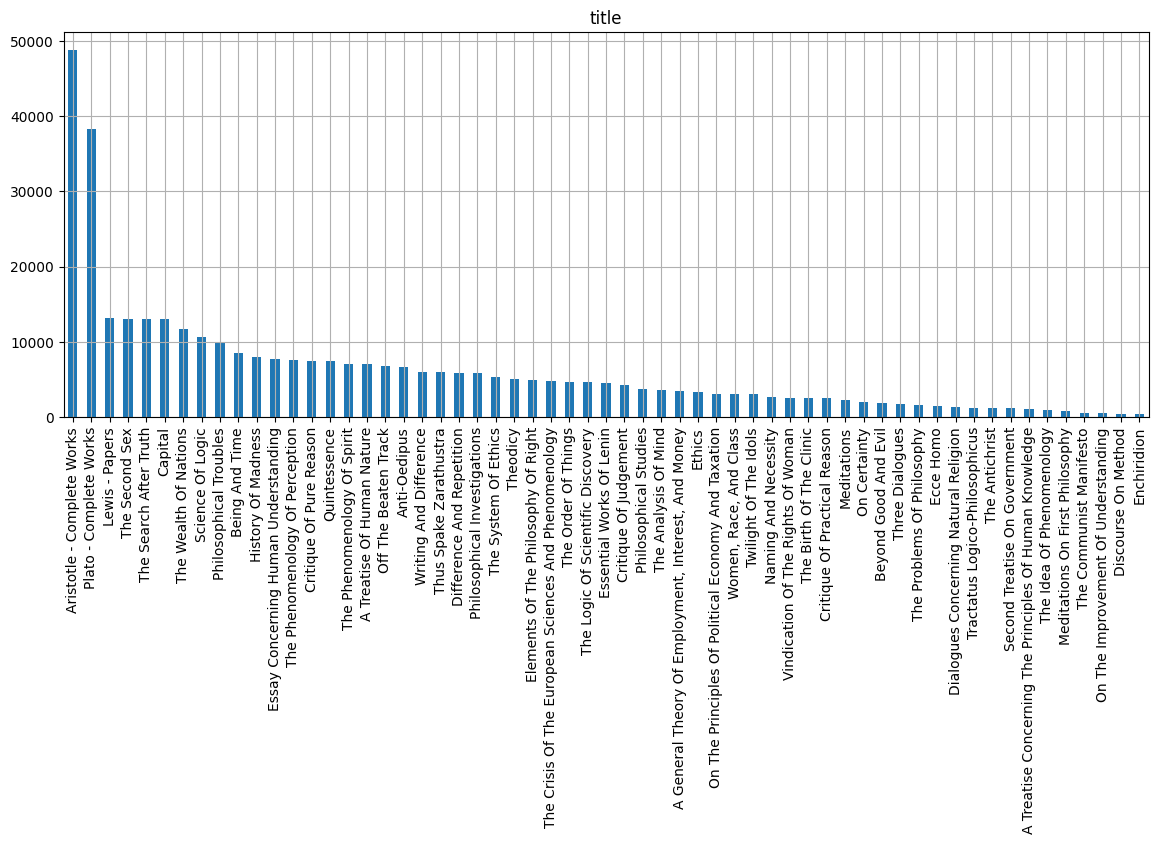

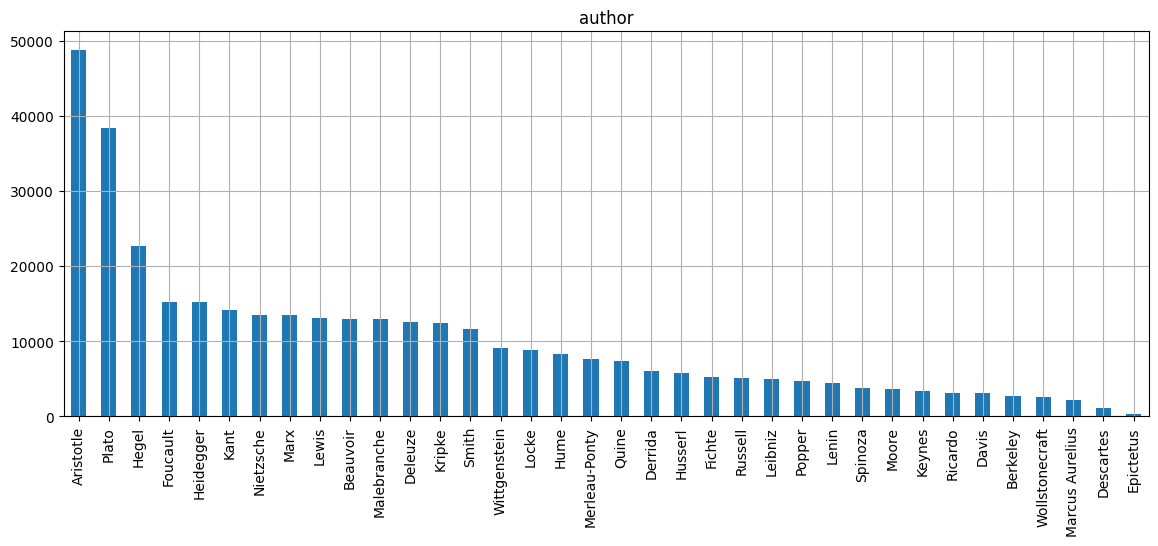

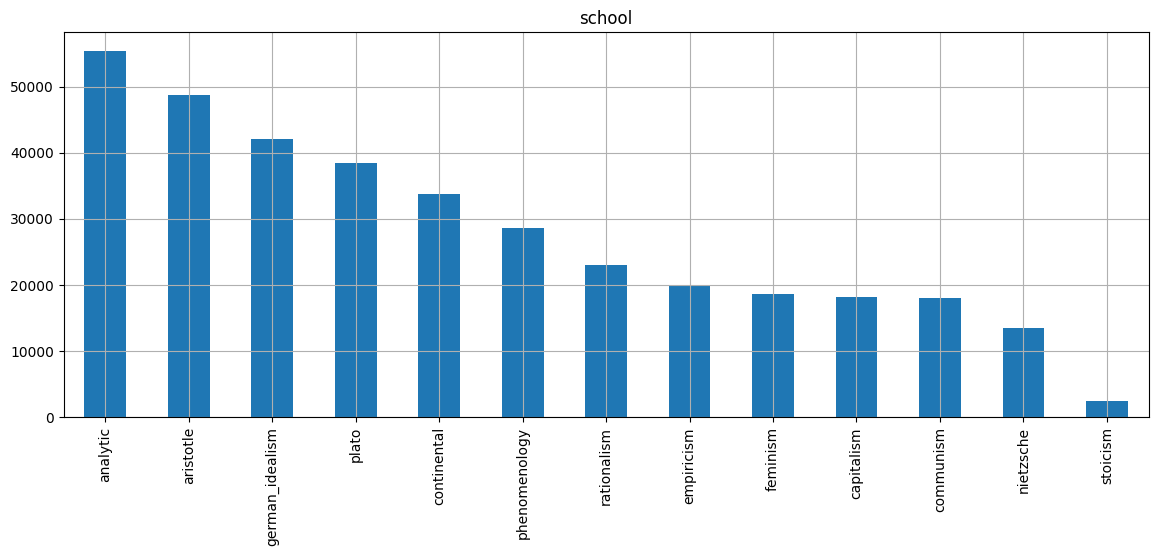

In [5]:
# plot distributions of these features
cols = ['title', 'author', 'school']
for col in cols:
    plt.figure(figsize=(14,5))
    ds[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.grid()
    plt.show()

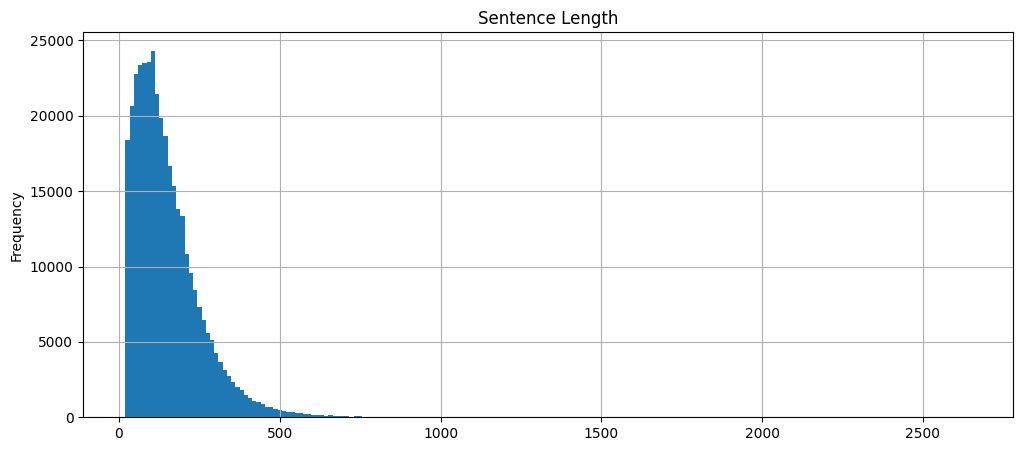

In [323]:
# plot distribution of sentence length
plt.figure(figsize=(12,5))
ds.sentence_length.plot(kind='hist', bins=200)
plt.title('Sentence Length')
plt.grid()
plt.show()

In [7]:
schools = ds.school.unique().tolist()
print(schools)

['plato', 'aristotle', 'empiricism', 'rationalism', 'analytic', 'continental', 'phenomenology', 'german_idealism', 'communism', 'capitalism', 'stoicism', 'nietzsche', 'feminism']


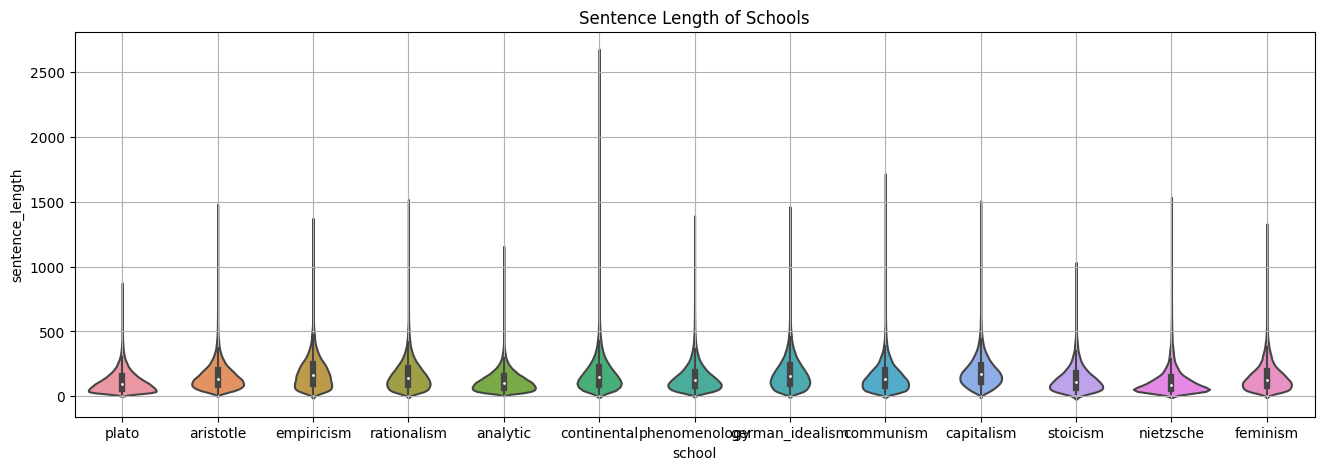

In [8]:
# plot sentence length of different schools
plt.figure(figsize=(16,5))
sns.violinplot(x='school', y='sentence_length', data=ds)
plt.title('Sentence Length of Schools')
plt.grid()

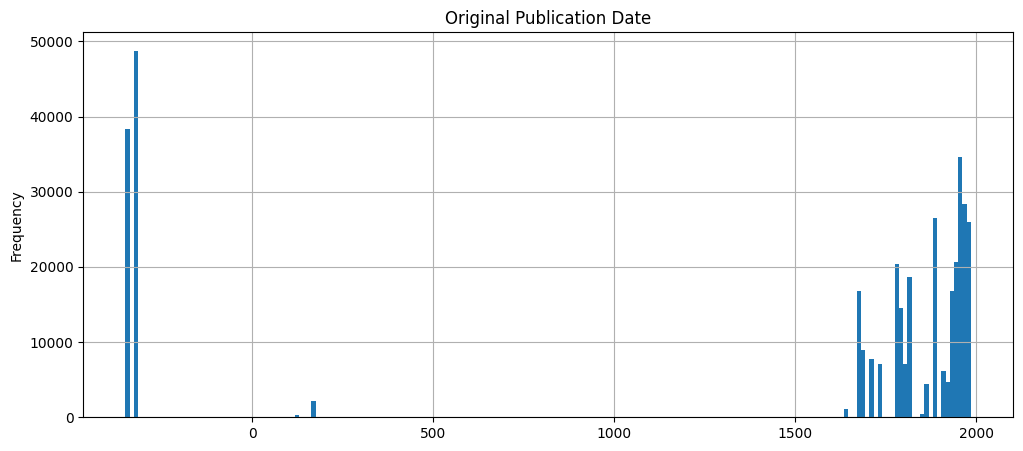

In [10]:
# plot distribution of original publication date
plt.figure(figsize=(12,5))
ds.original_publication_date.plot(kind='hist', bins=200)
plt.title('Original Publication Date')
plt.grid()
plt.show()

## Data Processing and Cleaning
- Check to see if NaN exists.
- Tokenized text and lemmatized string are already given, hence no more data processing in this case.
- Split the data for further exploration.
- Set stopwords and use wordcloud to check word frequency in general.

In [20]:
ds.sentence_spacy.isna().sum()

0

In [3]:
bef = ds.loc[ds.original_publication_date<250]
bef.shape

(89680, 11)

In [4]:
aft = ds.loc[ds.original_publication_date>500]
aft.shape

(271128, 11)

In [73]:
bef.school.unique()

array(['plato', 'aristotle', 'stoicism'], dtype=object)

In [31]:
aft.school.unique()

array(['empiricism', 'rationalism', 'analytic', 'continental',
       'phenomenology', 'german_idealism', 'communism', 'capitalism',
       'nietzsche', 'feminism'], dtype=object)

In [5]:
from wordcloud import WordCloud

In [15]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

In [16]:
bef['sentence'] = bef.sentence_lowered.map(lambda x: re.sub("[,\.!?';:]", '', x))

C:\Users\28047\AppData\Local\Temp\ipykernel_13776\1067589977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bef['sentence'] = bef.sentence_lowered.map(lambda x: re.sub("[,\.!?';:]", '', x))


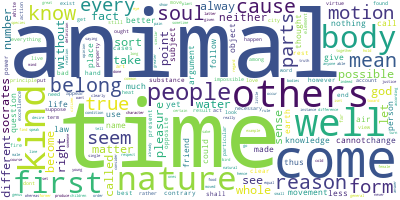

In [85]:
# wordcloud for bef
long_string = ','.join(list(bef['sentence'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop_words)
wordcloud.generate(long_string)
wordcloud.to_image()

In [17]:
aft['sentence'] = aft.sentence_lowered.map(lambda x: re.sub("[,\.!?';:]", '', x))

C:\Users\28047\AppData\Local\Temp\ipykernel_13776\254567246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aft['sentence'] = aft.sentence_lowered.map(lambda x: re.sub("[,\.!?';:]", '', x))


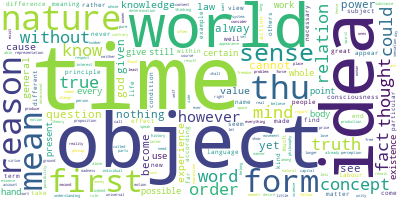

In [84]:
# word cloud for aft
long_string2 = ','.join(list(aft['sentence'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop_words)
wordcloud.generate(long_string2)
wordcloud.to_image()

As we can see from the two wordclouds, some of the words are different by times. And fewer meaningless words exist after using stopwords.
<br>We will analyze the data further below.

## Data Analysis
- Topic Modeling
  - Extend some stopwords after try and error in LDA.
  - Plot the word counts and the weights of each keyword in the same chart.
  - Extract the dominant topic and its percentage contribution in each document.
  - Get the most representative sentence for each topic.
  - Select some of the words and topics above to see which schools mention them most in different times.
  - Check some wordcloud of schools to prove findings of different features.
  - Check some most frequent words related with 'female' and 'male', 'woman' and 'man' to see the difference and explore the reason.

In [18]:
stop_words.extend(['one', 'thing', 'things', 'would', 'also','may','said','must','either','say','many','something','way','like','case','two','another','even','man','think','part','else','good','though','since','us','make','makes','men','eg','whether','whatever','therefore','state','anything','might','merely','ye','upon'])

In [19]:
from gensim.utils import simple_preprocess

In [20]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

In [32]:
beftokens = [eval(tokens) for tokens in bef['tokenized_txt']]

In [21]:
import gensim.corpora as corpora

In [22]:
from pprint import pprint

In [23]:
import gensim

In [24]:
import matplotlib.colors as mcolors

In [197]:
# use LDA
beftoken = remove_stopwords(beftokens)
id2word = corpora.Dictionary(beftoken)
texts = beftoken
corpus = [id2word.doc2bow(text) for text in texts]
num_topics = 10

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.012*"water" + 0.010*"parts" + 0.008*"air" + 0.007*"well" + 0.007*"cannot" '
  '+ 0.007*"earth" + 0.007*"nature" + 0.007*"whole" + 0.006*"fire" + '
  '0.005*"know"'),
 (1,
  '0.012*"socrates" + 0.008*"kind" + 0.007*"mean" + 0.007*"time" + '
  '0.006*"genus" + 0.006*"people" + 0.006*"nature" + 0.006*"others" + '
  '0.005*"number" + 0.005*"well"'),
 (2,
  '0.011*"substance" + 0.007*"possible" + 0.006*"know" + 0.006*"see" + '
  '0.006*"power" + 0.006*"shall" + 0.006*"others" + 0.005*"thought" + '
  '0.005*"equal" + 0.005*"belongs"'),
 (3,
  '0.008*"every" + 0.005*"life" + 0.005*"possible" + 0.004*"people" + '
  '0.004*"let" + 0.004*"clear" + 0.004*"right" + 0.004*"person" + 0.004*"know" '
  '+ 0.004*"without"'),
 (4,
  '0.006*"sometimes" + 0.006*"called" + 0.006*"well" + 0.005*"movement" + '
  '0.004*"come" + 0.004*"shall" + 0.004*"weight" + 0.004*"fact" + 0.004*"bad" '
  '+ 0.004*"among"'),
 (5,
  '0.011*"different" + 0.009*"time" + 0.009*"knowledge" + 0.008*"point" + '
  '0.008

C:\Users\28047\AppData\Local\Temp\ipykernel_7420\462869421.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\28047\AppData\Local\Temp\ipykernel_7420\462869421.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\28047\AppData\Local\Temp\ipykernel_7420\462869421.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\28047\AppData\Local\Temp\ipykernel_7420\462869421.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\28047\AppData\Local\Temp\ipykernel_7420\462

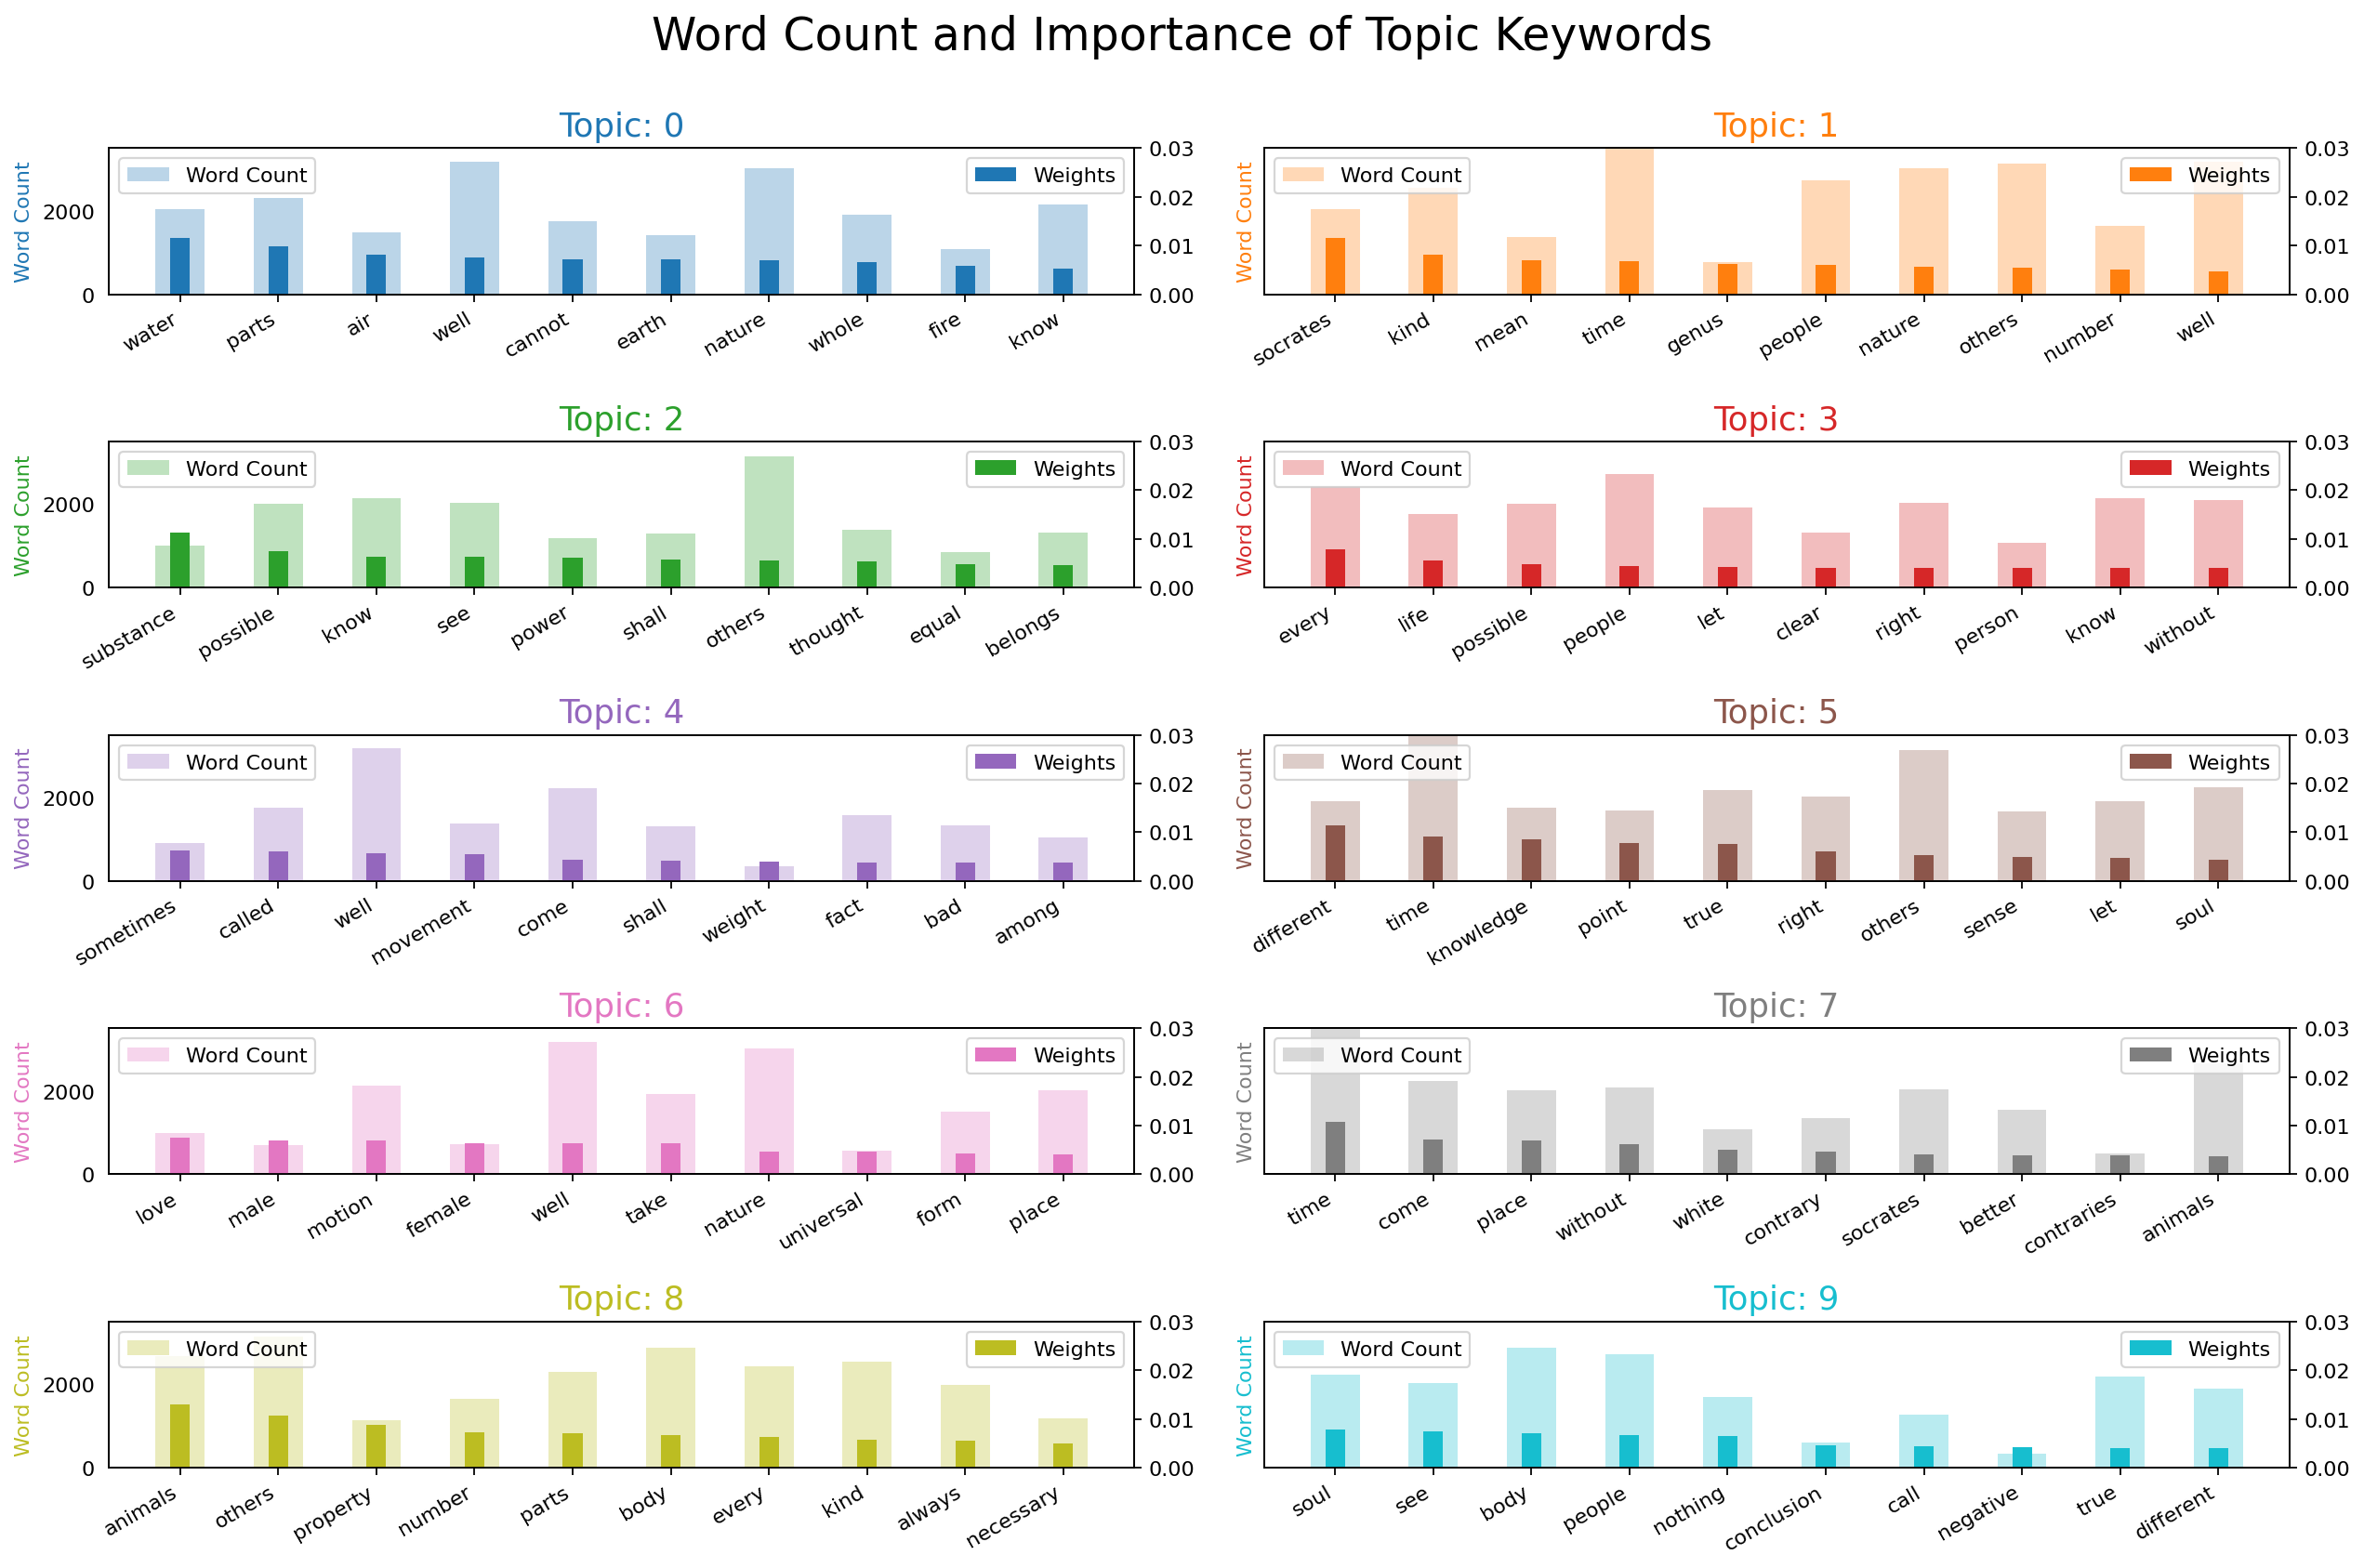

In [198]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in beftoken for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [37]:
afttokens = [eval(tokens) for tokens in aft['tokenized_txt']]

In [199]:
# use LDA
afttoken = remove_stopwords(afttokens)
id2word_aft = corpora.Dictionary(afttoken)
texts_aft = afttoken
corpus_aft = [id2word_aft.doc2bow(text) for text in texts_aft]

lda_model_aft = gensim.models.LdaMulticore(corpus=corpus_aft,
                                       id2word=id2word_aft,
                                       num_topics=num_topics)

pprint(lda_model_aft.print_topics())
doc_lda_aft = lda_model_aft[corpus]

[(0,
  '0.009*"woman" + 0.008*"love" + 0.006*"women" + 0.006*"form" + '
  '0.005*"relation" + 0.005*"life" + 0.004*"class" + 0.004*"person" + '
  '0.004*"see" + 0.004*"rent"'),
 (1,
  '0.011*"time" + 0.011*"object" + 0.008*"woman" + 0.007*"body" + '
  '0.006*"quantity" + 0.005*"subject" + 0.005*"without" + 0.005*"objects" + '
  '0.005*"space" + 0.005*"infinite"'),
 (2,
  '0.009*"great" + 0.008*"trade" + 0.007*"reason" + 0.006*"world" + '
  '0.005*"truth" + 0.005*"without" + 0.004*"language" + 0.004*"finally" + '
  '0.004*"nature" + 0.004*"objective"'),
 (3,
  '0.013*"women" + 0.011*"price" + 0.007*"power" + 0.006*"labour" + '
  '0.005*"theory" + 0.005*"money" + 0.004*"nature" + 0.004*"surplus" + '
  '0.004*"without" + 0.004*"analysis"'),
 (4,
  '0.014*"world" + 0.009*"time" + 0.008*"black" + 0.007*"different" + '
  '0.005*"possible" + 0.005*"value" + 0.005*"unity" + 0.004*"day" + '
  '0.004*"commodity" + 0.004*"conditions"'),
 (5,
  '0.009*"present" + 0.007*"empirical" + 0.007*"existen

C:\Users\28047\AppData\Local\Temp\ipykernel_7420\3985000233.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\28047\AppData\Local\Temp\ipykernel_7420\3985000233.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\28047\AppData\Local\Temp\ipykernel_7420\3985000233.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\28047\AppData\Local\Temp\ipykernel_7420\3985000233.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\28047\AppData\Local\Temp\ipykernel_7420

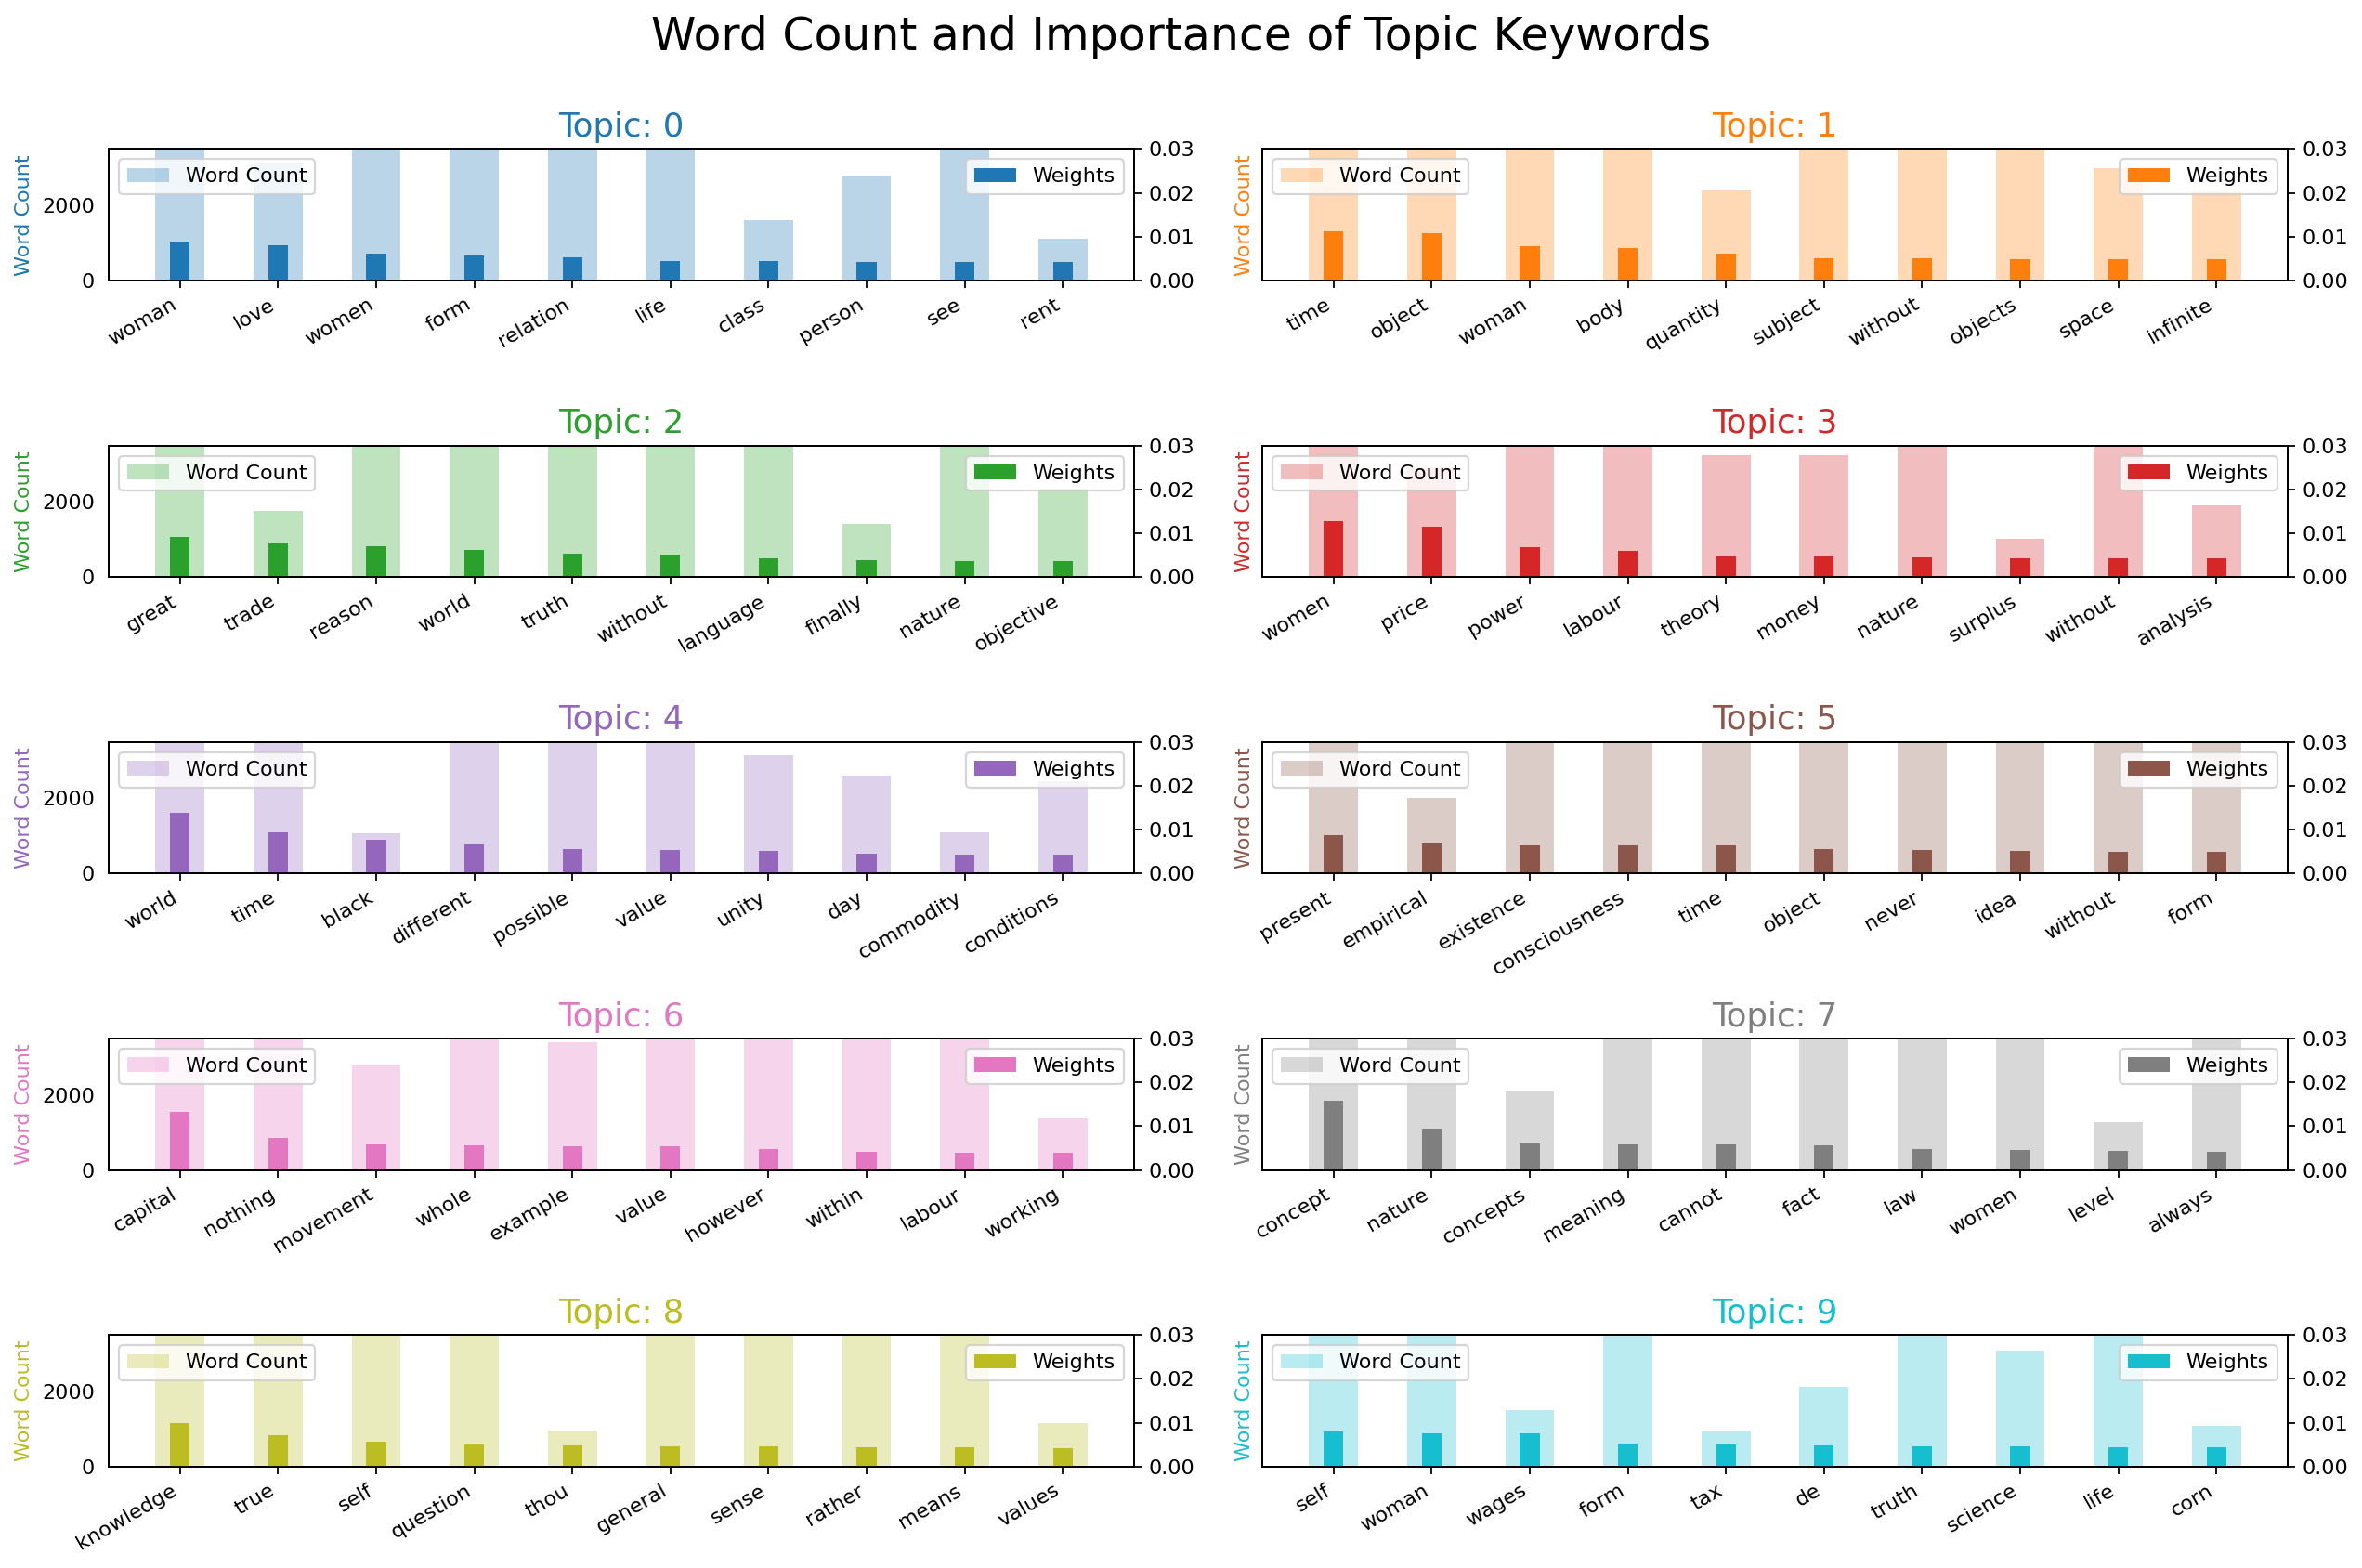

In [200]:
from collections import Counter
topics = lda_model_aft.show_topics(formatted=False)
data_flat = [w for w_list in afttoken for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [313]:
# the dominant topic and its percentage
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    sent_topics_df = pd.DataFrame()
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=beftoken)

df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

C:\Users\28047\AppData\Local\Temp\ipykernel_7420\685433624.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               0              0.6723   
1            1               4              0.6845   
2            2               3              0.5728   
3            3               0              0.1000   
4            4               6              0.8713   
5            5               7              0.6994   
6            6               3              0.7749   
7            7               6              0.7749   
8            8               5              0.7749   
9            9               5              0.8413   

                                            Keywords  \
0  water, parts, air, well, cannot, earth, nature...   
1  sometimes, called, well, movement, come, shall...   
2  every, life, possible, people, let, clear, rig...   
3  water, parts, air, well, cannot, earth, nature...   
4  love, male, motion, female, well, take, nature...   
5  time, come, place, without, white, contrary, s...   
6  every, life, possible, people, let, clear, rig...   
7  love, male, motion, female, well, take, nature...   
8  different, time, knowledge, point, true, right...   
9  different, time, knowledge, point, true, right...   

                                                Text  
0  [new, socrates, leave, usual, haunts, lyceum, ...  
1        [surely, prosecuting, anyone, king, archon]  
2  [athenians, call, prosecution, indictment, eut...  
3                                                 []  
4  [someone, indicted, going, tell, indicted, som...  
5                                [someone, indicted]  
6                          [really, know, euthyphro]  
7                       [apparently, young, unknown]  
8                           [call, meletus, believe]  
9  [belongs, pitthean, deme, know, anyone, deme, ...

In [314]:
# the most representative sentence for each topic
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)
   
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

sent_topics_sorteddf_mallet.head(10)

Topic_Num  Topic_Perc_Contrib  \
0          0              0.9785   
1          1              0.9757   
2          2              0.9742   
3          3              0.9791   
4          4              0.9774   
5          5              0.9845   
6          6              0.9790   
7          7              0.9769   
8          8              0.9808   
9          9              0.9795   

                                                                             Keywords  \
0                   water, parts, air, well, cannot, earth, nature, whole, fire, know   
1             socrates, kind, mean, time, genus, people, nature, others, number, well   
2       substance, possible, know, see, power, shall, others, thought, equal, belongs   
3             every, life, possible, people, let, clear, right, person, know, without   
4            sometimes, called, well, movement, come, shall, weight, fact, bad, among   
5            different, time, knowledge, point, true, right, others, sense, let, soul   
6              love, male, motion, female, well, take, nature, universal, form, place   
7  time, come, place, without, white, contrary, socrates, better, contraries, animals   
8      animals, others, property, number, parts, body, every, kind, always, necessary   
9       soul, see, body, people, nothing, conclusion, call, negative, true, different   

                                                                                   Representative Text  
0  [surely, cannot, maintain, assumption, respect, four, classes, limit, unlimited, mixture, cause,...  
1  [someone, breaks, lyre, cuts, breaks, strings, insists, using, argument, harmony, still, exist, ...  
2  [surely, right, repeat, guardian, seeks, happiness, longer, guardian, satisfied, life, moderate,...  
3  [older, lover, young, come, together, obeys, principle, appropriate, lover, realizes, justified,...  
4  [describe, dancing, movements, gods, juxtapositions, back, circlings, advances, circular, course...  
5  [considerations, follows, neither, cosmos, always, responsible, turning, turned, god, pair, oppo...  
6  [others, whose, natures, capable, becoming, composed, stable, direction, nobility, acquire, educ...  
7  [hand, recall, fathers, hire, attendants, sons, soon, old, enough, attractive, attendant, main, ...  
8  [everything, changed, imitating, following, condition, universe, particular, change, mode, conce...  
9  [result, see, beauty, knowledge, looking, mainly, beauty, single, example, servant, favored, bea...

In [315]:
# the dominant topic and its percentage
df_topic_sents_keywords_aft = format_topics_sentences(ldamodel=lda_model_aft, corpus=corpus_aft, texts=afttoken)

df_dominant_topic_aft = df_topic_sents_keywords_aft.reset_index()
df_dominant_topic_aft.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic_aft.head(10)

C:\Users\28047\AppData\Local\Temp\ipykernel_7420\685433624.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               3              0.6369   
1            1               3              0.4303   
2            2               3              0.9709   
3            3               8              0.9833   
4            4               6              0.6829   
5            5               4              0.8089   
6            6               8              0.8234   
7            7               6              0.9306   
8            8               2              0.8874   
9            9               6              0.5183   

                                                                              Keywords  \
0       women, price, power, labour, theory, money, nature, surplus, without, analysis   
1       women, price, power, labour, theory, money, nature, surplus, without, analysis   
2       women, price, power, labour, theory, money, nature, surplus, without, analysis   
3         knowledge, true, self, question, thou, general, sense, rather, means, values   
4  capital, nothing, movement, whole, example, value, however, within, labour, working   
5    world, time, black, different, possible, value, unity, day, commodity, conditions   
6         knowledge, true, self, question, thou, general, sense, rather, means, values   
7  capital, nothing, movement, whole, example, value, however, within, labour, working   
8    great, trade, reason, world, truth, without, language, finally, nature, objective   
9  capital, nothing, movement, whole, example, value, however, within, labour, working   

                                                                                                  Text  
0  [reader, thou, hast, beginning, end, discourse, concerning, government, fate, otherwise, dispose...  
1  [remain, hope, sufficient, establish, throne, great, restorer, present, king, william, title, co...  
2  [papers, evidence, flatter, found, great, miss, lost, reader, satisfied, without, imagine, shall...  
3  [king, body, nation, thoroughly, confuted, hypothesis, suppose, body, hereafter, confidence, app...  
4  [worth, examine, works, thro, let, experiment, treats, usurpation, let, try, skill, sir, robert,...  
5  [speak, plainly, gentleman, long, past, answering, pulpit, late, years, publicly, owned, doctrin...  
6  [necessary, taking, teachers, dangerously, misled, others, openly, shewed, authority, patriarch,...  
7  [scripture, proofs, amongst, crying, books, espousing, doctrine, save, reproach, writing, dead, ...  
8                                                   [zealous, point, done, wrong, cannot, hope, spare]  
9                   [wish, done, truth, public, wrong, ready, redress, allow, weight, reflection, viz]

In [316]:
# the most representative sentence for each topic
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet_aft = pd.DataFrame()
sent_topics_outdf_grpd_aft = df_topic_sents_keywords_aft.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd_aft:
    sent_topics_sorteddf_mallet_aft = pd.concat([sent_topics_sorteddf_mallet_aft, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)
 
sent_topics_sorteddf_mallet_aft.reset_index(drop=True, inplace=True)

sent_topics_sorteddf_mallet_aft.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

sent_topics_sorteddf_mallet_aft.head(10)

Topic_Num  Topic_Perc_Contrib  \
0          0              0.9901   
1          1              0.9819   
2          2              0.9812   
3          3              0.9873   
4          4              0.9812   
5          5              0.9833   
6          6              0.9855   
7          7              0.9823   
8          8              0.9888   
9          9              0.9780   

                                                                                 Keywords  \
0                      woman, love, women, form, relation, life, class, person, see, rent   
1         time, object, woman, body, quantity, subject, without, objects, space, infinite   
2       great, trade, reason, world, truth, without, language, finally, nature, objective   
3          women, price, power, labour, theory, money, nature, surplus, without, analysis   
4       world, time, black, different, possible, value, unity, day, commodity, conditions   
5  present, empirical, existence, consciousness, time, object, never, idea, without, form   
6     capital, nothing, movement, whole, example, value, however, within, labour, working   
7             concept, nature, concepts, meaning, cannot, fact, law, women, level, always   
8            knowledge, true, self, question, thou, general, sense, rather, means, values   
9                           self, woman, wages, form, tax, de, truth, science, life, corn   

                                                                                   Representative Text  
0  [let, see, absolute, power, necessary, arbitrary, absolute, still, limited, reason, confined, en...  
1  [put, spot, ink, paper, retire, distance, spot, becomes, altogether, invisible, find, return, ne...  
2  [know, mechanical, affections, particles, rhubarb, hemlock, opium, watchmaker, watch, whereby, p...  
3  [legislative, made, representatives, chosen, time, people, afterwards, return, ordinary, subject...  
4  [later, comes, general, ideas, maxims, know, signification, generic, terms, stand, put, together...  
5  [difference, according, unthinking, beings, perceived, sense, existence, distinct, perceived, ca...  
6  [ever, prefer, weal, public, whole, commonwealth, making, laws, constitutions, particular, priva...  
7  [ask, place, verses, report, story, nisus, euryalus, improper, determine, place, saying, earth, ...  
8  [give, kind, guess, kind, notions, whence, derived, filled, minds, beginners, languages, nature,...  
9  [talk, sort, birds, lately, saw, st, james, park, three, four, feet, high, covering, feathers, h...

In [25]:
def findcount(word,sch,ds):
    ds = ds.loc[ds.school==sch]
    sum = 0
    for texts in ds.tokenized_txt:
        sum += eval(texts).count(word)
    return(sum/len(ds))

In [81]:
schoolsaft = aft.school.unique()

In [80]:
schoolsbef = bef.school.unique()

In [26]:
def topschools(word):
    countsbef = []
    for sch in schoolsbef:
        countsbef.append(findcount(word,sch,bef))
    ds1 = pd.DataFrame({'counts': countsbef, 'sch': schoolsbef})
    ds1 = ds1.sort_values('counts')[1:]
    countsaft = []
    for sch in schoolsaft:
        countsaft.append(findcount(word,sch,aft))
    ds2 = pd.DataFrame({'counts': countsaft, 'sch': schoolsaft})
    ds2 = ds2.sort_values('counts')[7:]
    index = ['bef','aft']
    cols = ds1.sch.tolist()+ds2.sch.tolist()
    theds = pd.DataFrame(0,columns=cols,index=index)
    for col in ds1.sch:
        theds.loc['bef',col] = float(ds1.loc[ds1.sch==col,'counts'])
    for col in ds2.sch:
        theds.loc['aft',col] = float(ds2.loc[ds2.sch==col,'counts'])
    return(theds)

In [42]:
# representative keywords according to results above
keyw = ['water', 'air', 'earth', 'nature', 'fire', 'animals', 'socrates', 'time', 'equal', 'belongs', 'life', 'knowledge', 'soul', 'male', 'female', 'trade', 'price', 'power', 'labour', 'money', 'capital', 'working', 'law', 'wages', 'tax', 'commodity', 'woman', 'love', 'life', 'class', 'black', 'concept', 'language', 'theory', 'science', 'unity', 'empirical', 'existence', 'consciousness']

In [117]:
def findman(sch,ds):
    ds = ds.loc[ds.school==sch]
    sum = 0
    for texts in ds.sentence_lowered:
        if re.search(r'\bman\b',texts):
            sum += 1
    return(sum/len(ds))
def topschools2(word):
    countsbef = []
    for sch in schoolsbef:
        countsbef.append(findman(sch,bef))
    ds1 = pd.DataFrame({'counts': countsbef, 'sch': schoolsbef})
    ds1 = ds1.sort_values('counts')[1:]
    countsaft = []
    for sch in schoolsaft:
        countsaft.append(findman(sch,aft))
    ds2 = pd.DataFrame({'counts': countsaft, 'sch': schoolsaft})
    ds2 = ds2.sort_values('counts')[7:]
    index = ['bef','aft']
    cols = ds1.sch.tolist()+ds2.sch.tolist()
    theds = pd.DataFrame(0,columns=cols,index=index)
    for col in ds1.sch:
        theds.loc['bef',col] = float(ds1.loc[ds1.sch==col,'counts'])
    for col in ds2.sch:
        theds.loc['aft',col] = float(ds2.loc[ds2.sch==col,'counts'])
    return(theds)

<AxesSubplot: title={'center': 'Top Word Frequency For man Among Schools'}>

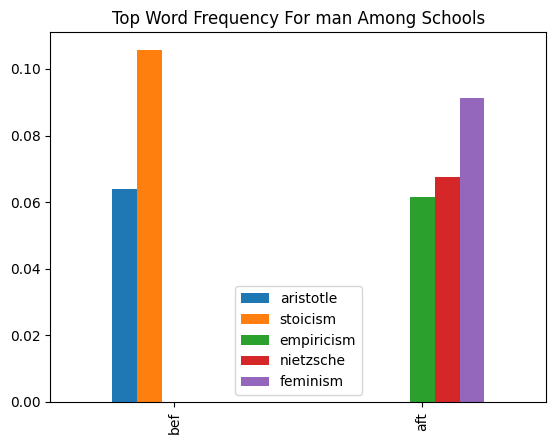

In [118]:
topschools2('man').plot(kind='bar',title='Top Word Frequency For man Among Schools')

D:\lib\site-packages\pandas\plotting\_matplotlib\core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


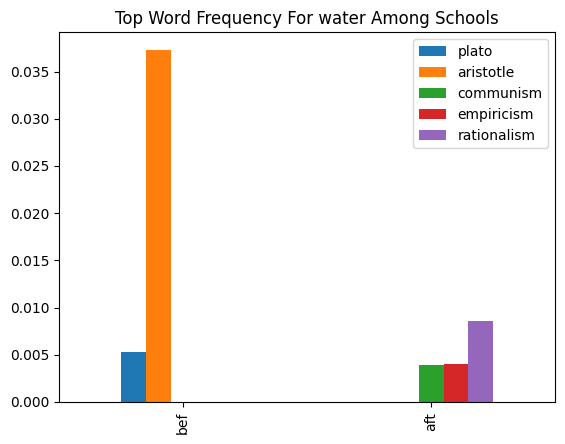

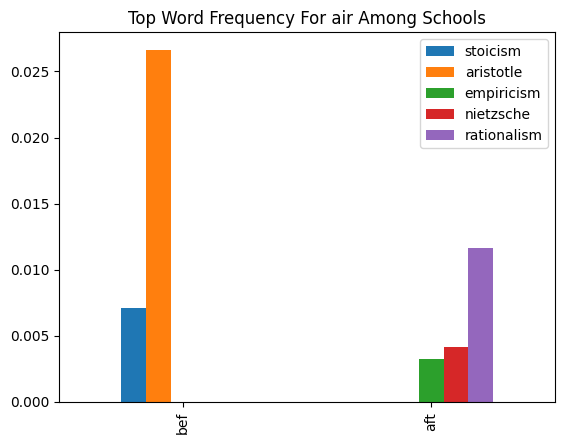

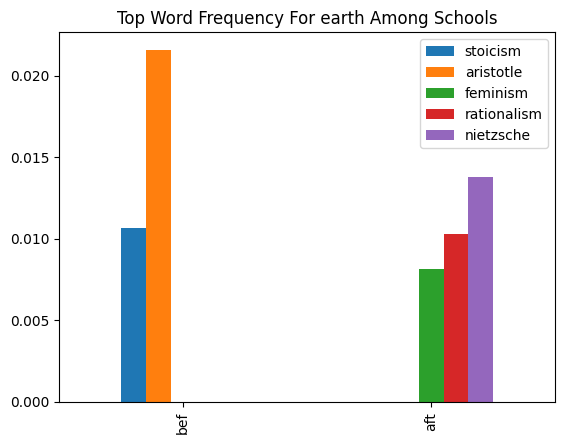

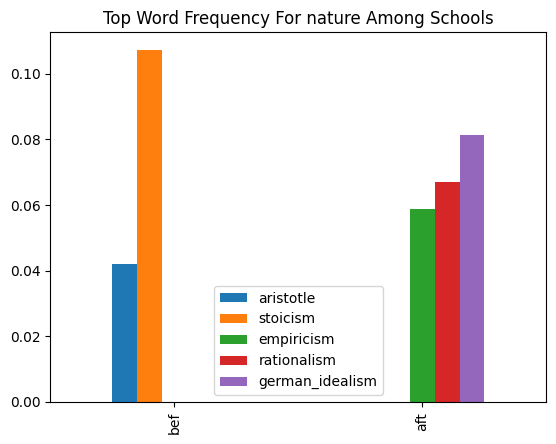

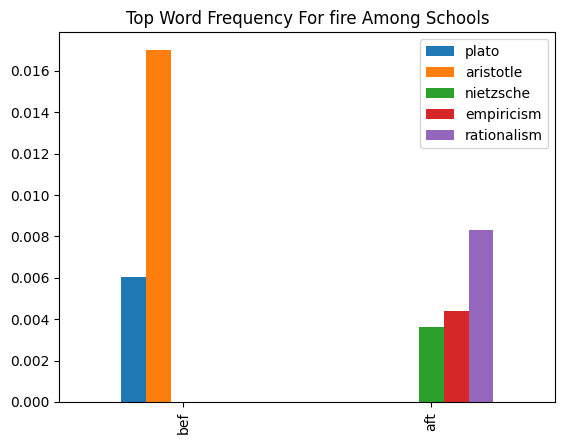

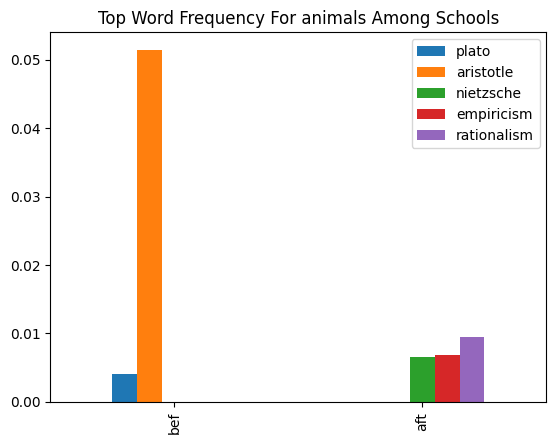

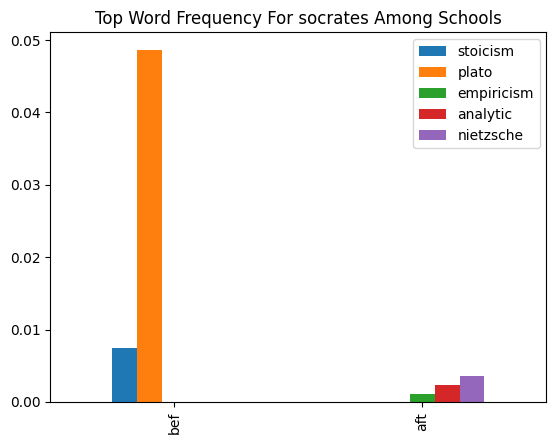

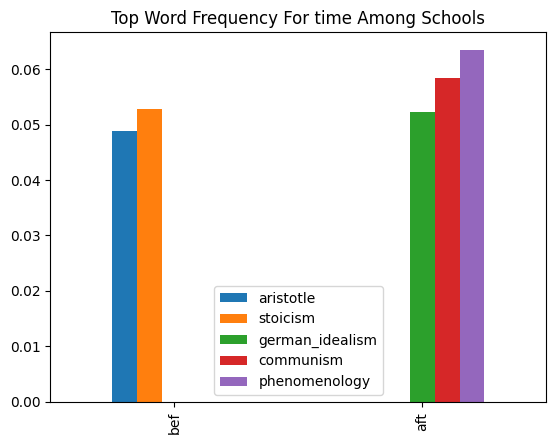

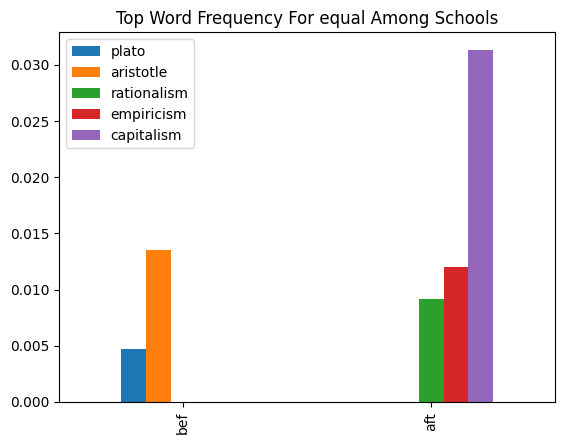

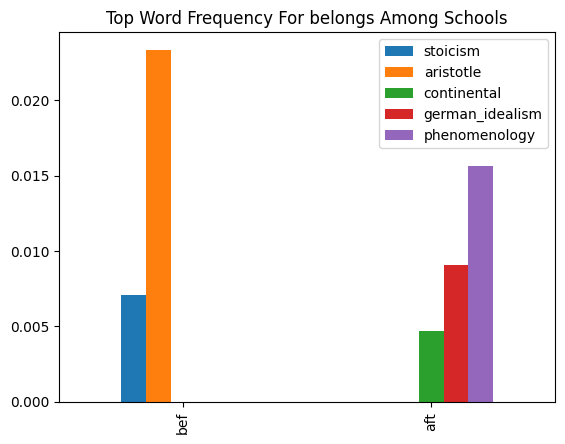

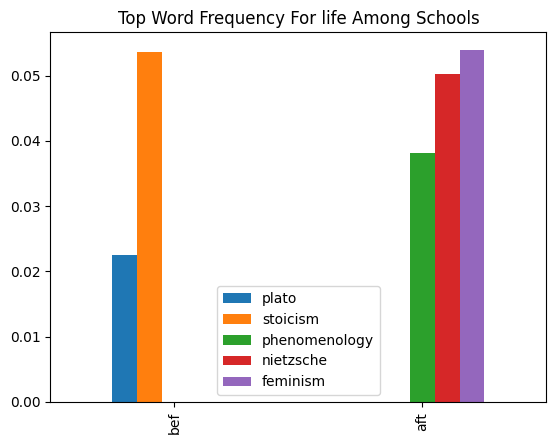

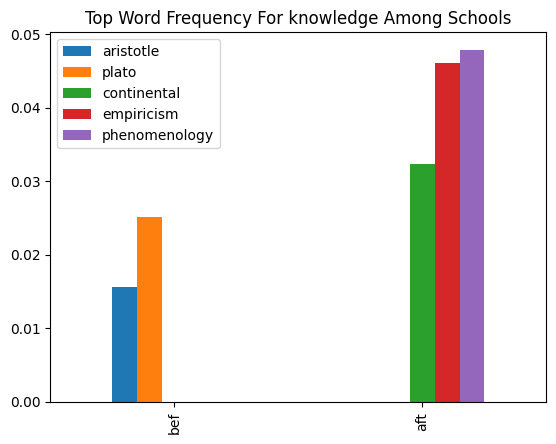

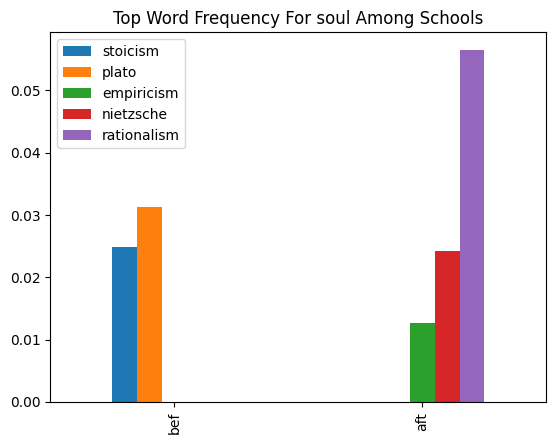

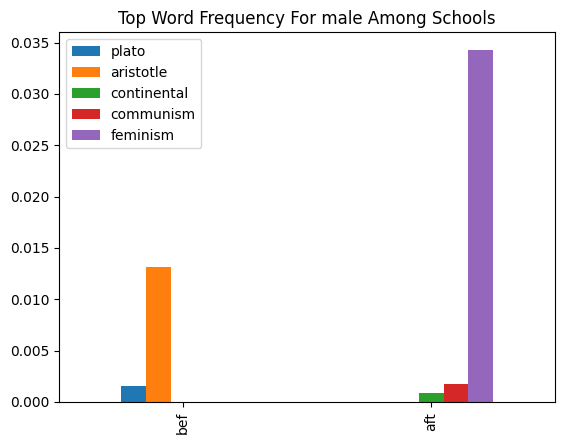

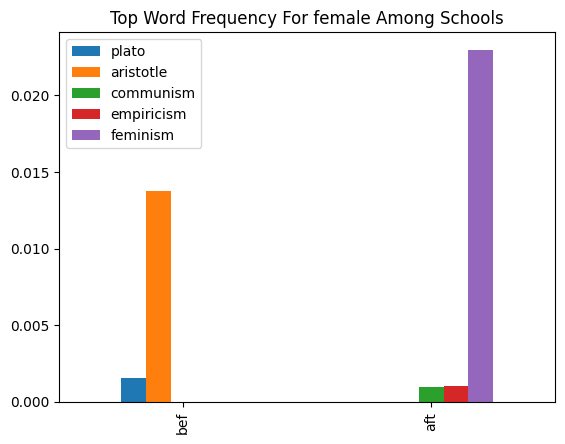

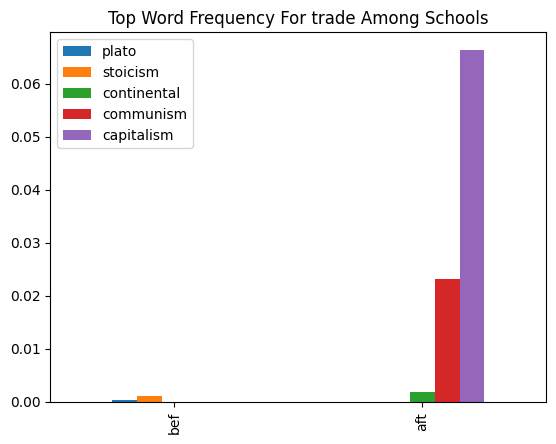

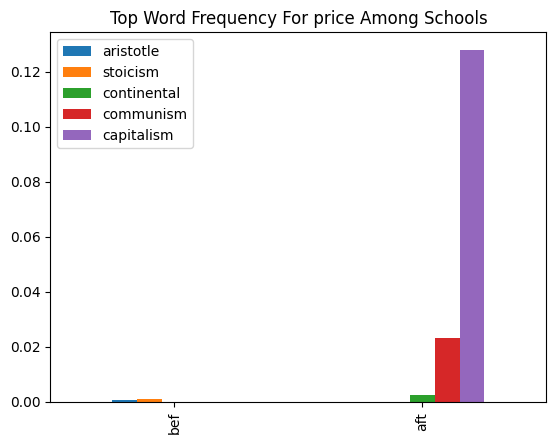

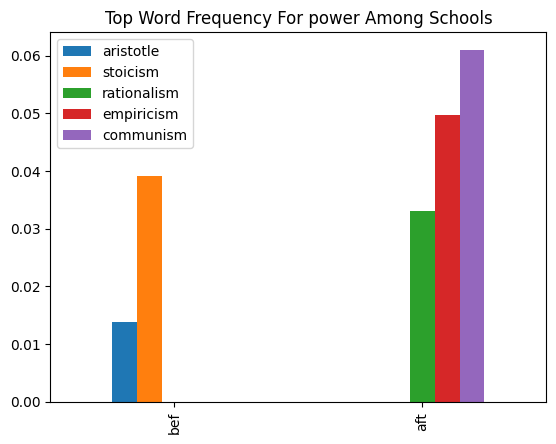

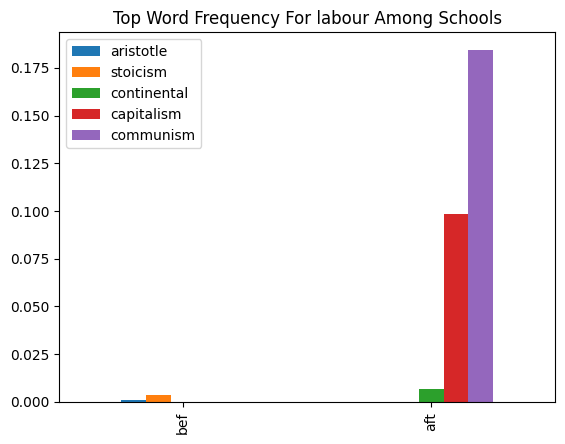

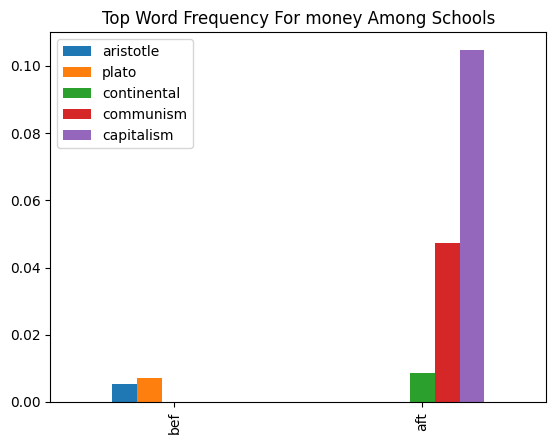

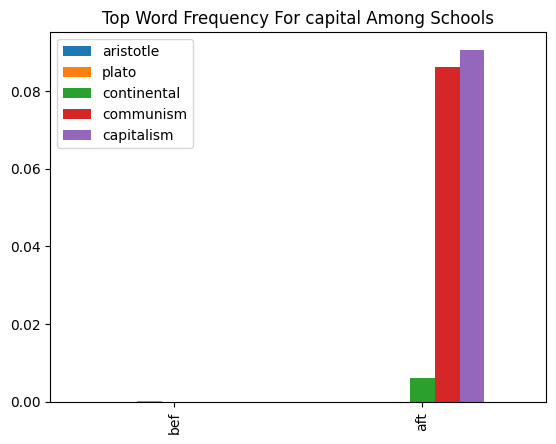

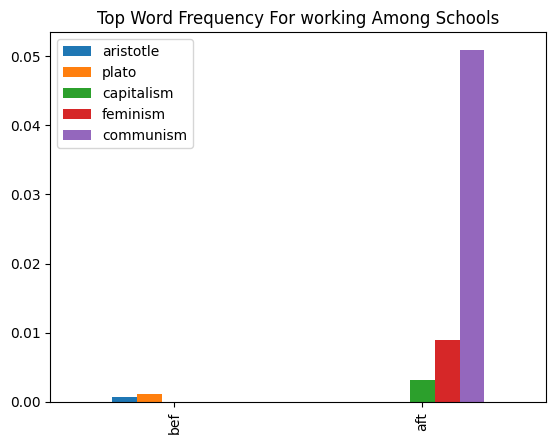

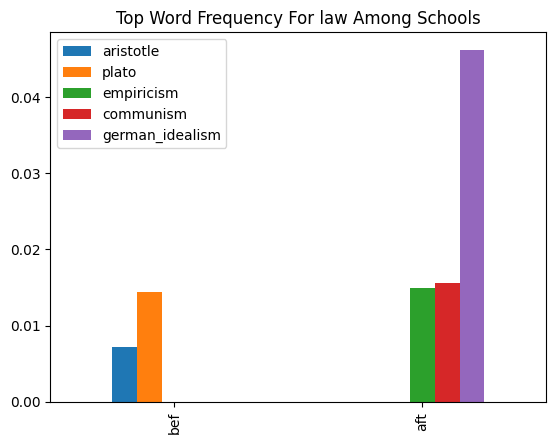

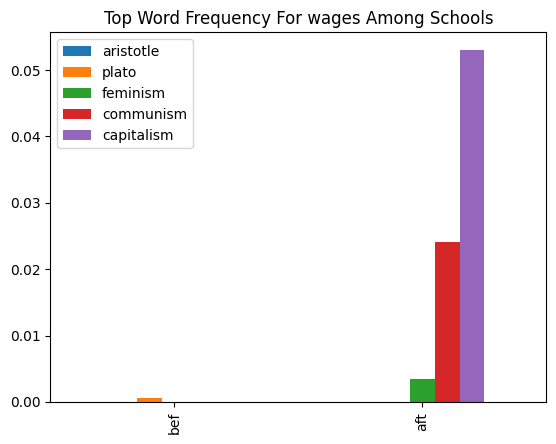

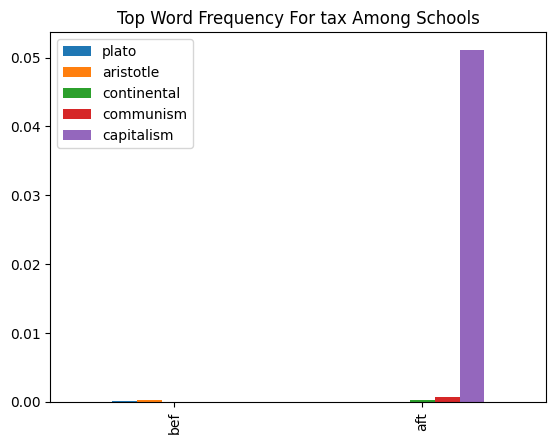

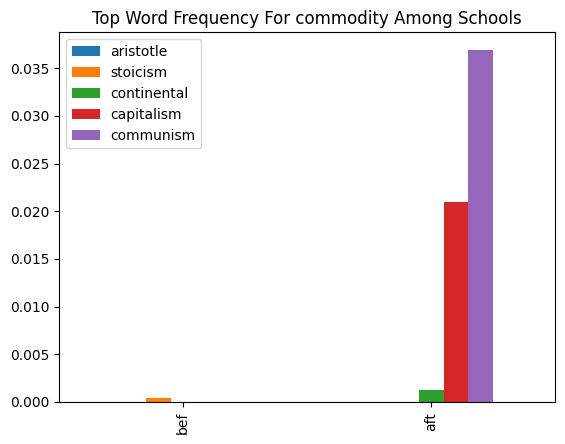

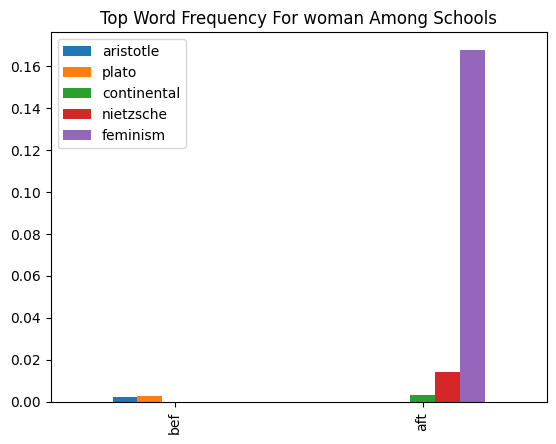

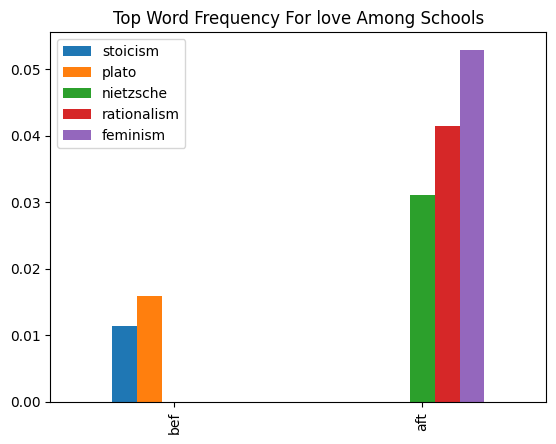

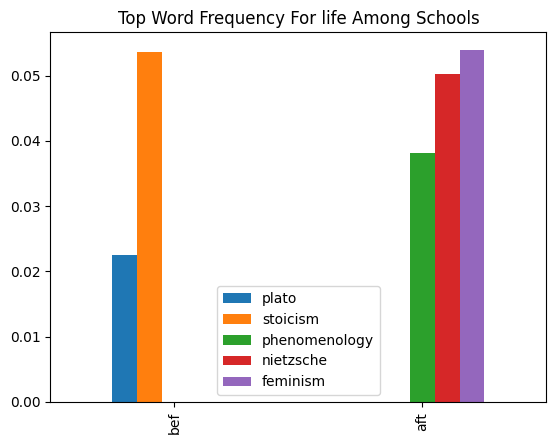

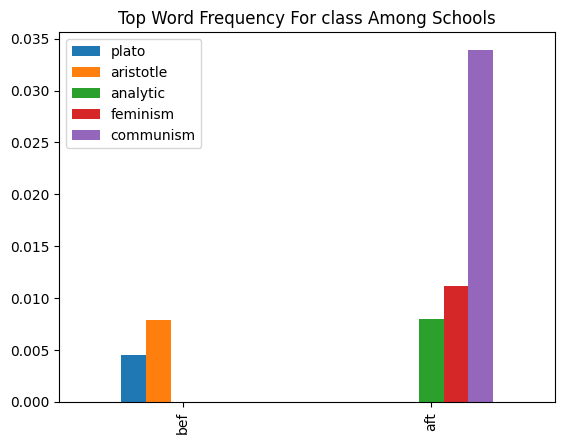

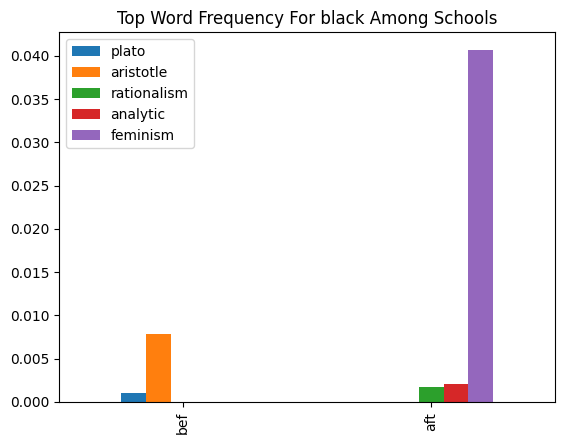

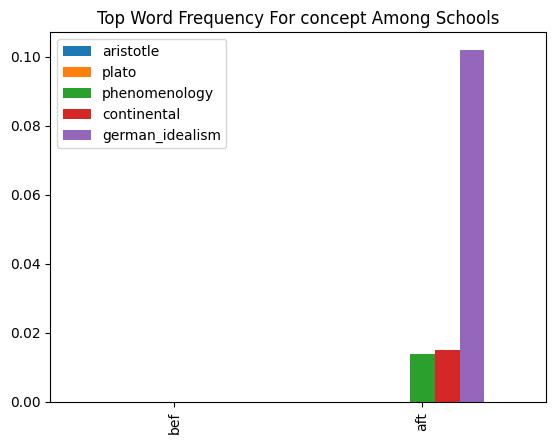

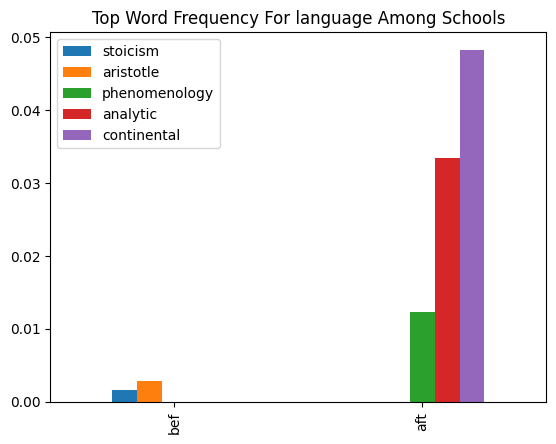

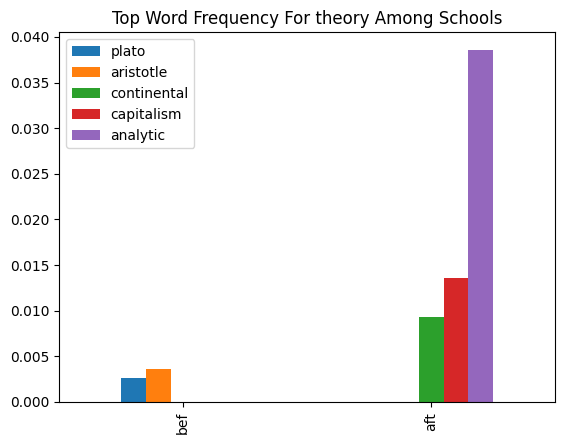

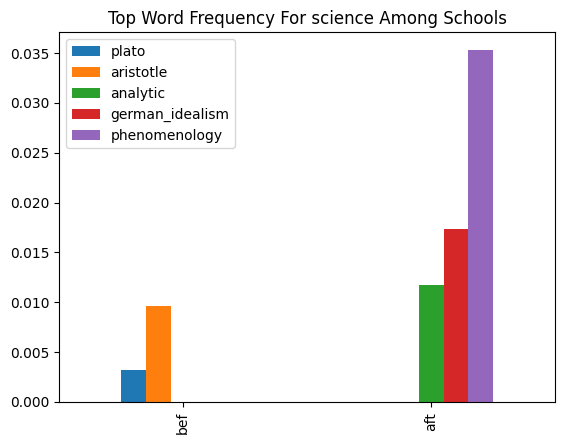

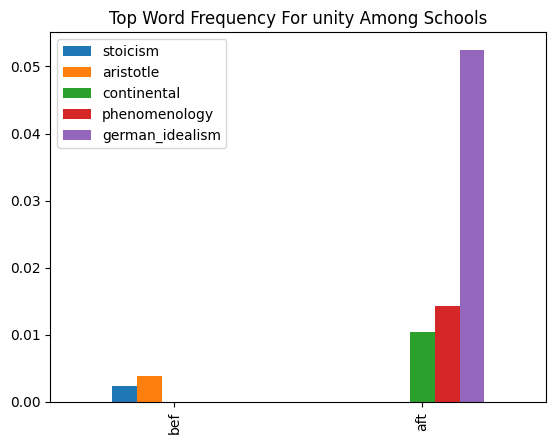

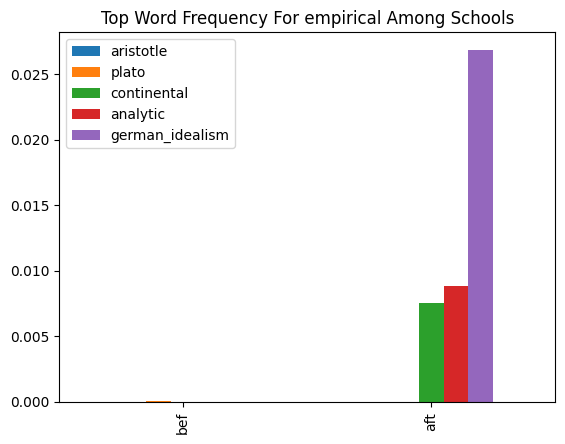

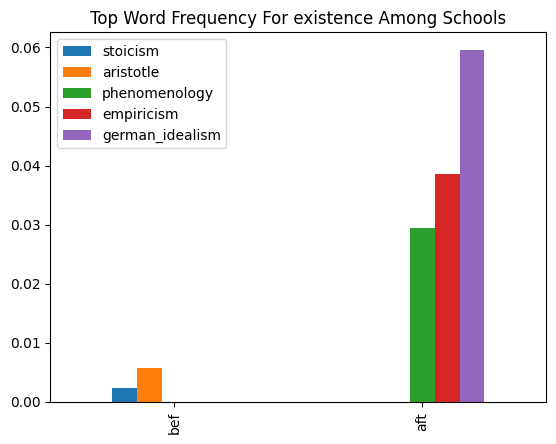

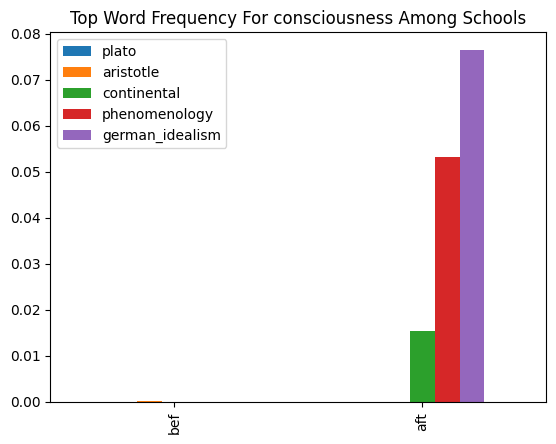

In [311]:
# plot top word frequency among schools
for word in keyw:
    topschools(word).plot(kind='bar',title='Top Word Frequency For '+word+' Among Schools')

In [318]:
keyw2 = ['ink','paper','spot','legislative','weal','commonwealth','constitutions','nisus']

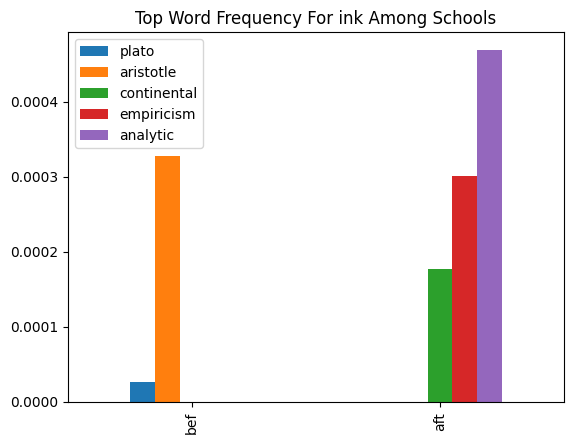

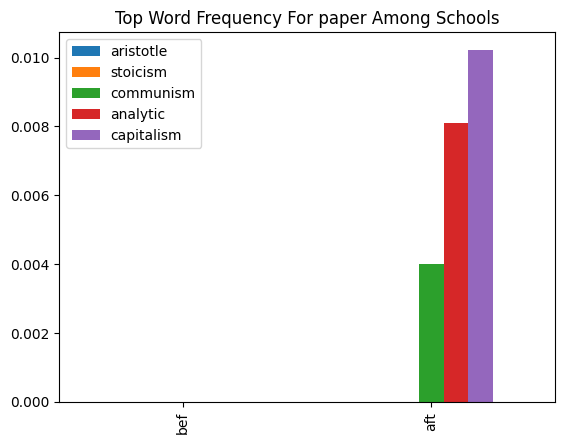

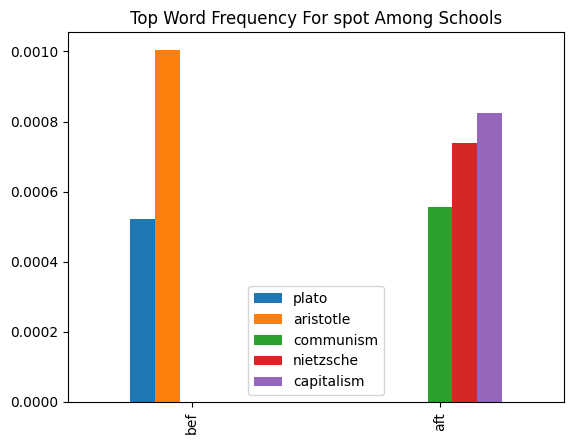

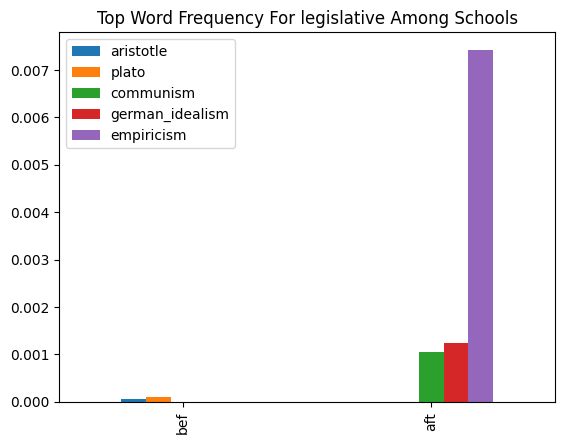

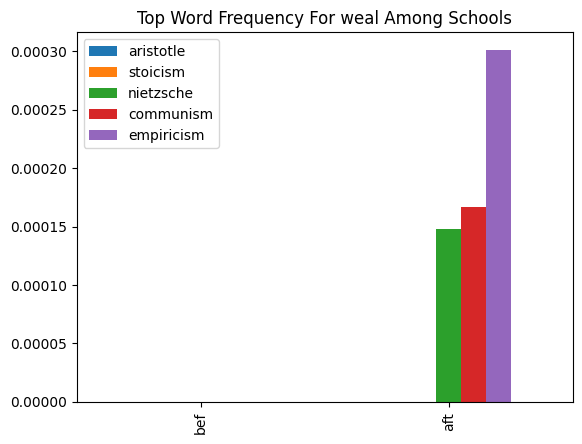

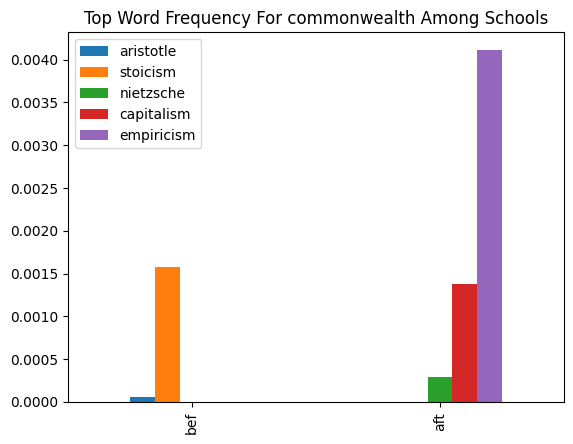

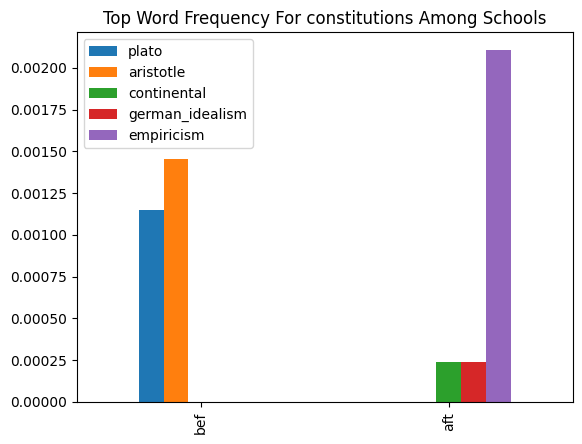

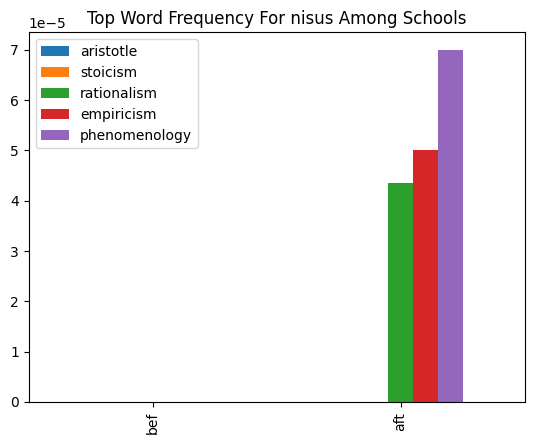

In [319]:
for word in keyw2:
    topschools(word).plot(kind='bar',title='Top Word Frequency For '+word+' Among Schools')

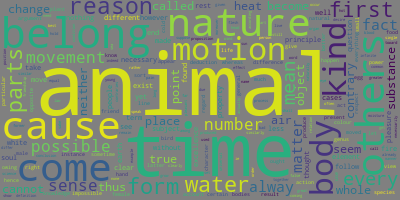

In [86]:
long_string_aristotle = ','.join(list(bef.loc[bef.school=='aristotle','sentence'].values))
wordcloud_a = WordCloud(background_color="grey", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop_words)
wordcloud_a.generate(long_string_aristotle)
wordcloud_a.to_image()

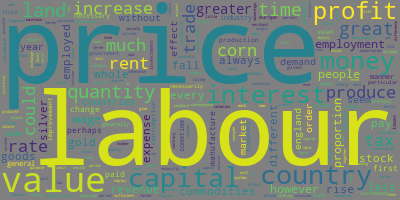

In [52]:
long_string_capitalism = ','.join(list(aft.loc[aft.school=='capitalism','sentence'].values))
wordcloud_c = WordCloud(background_color="grey", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop_words)
wordcloud_c.generate(long_string_capitalism)
wordcloud_c.to_image()

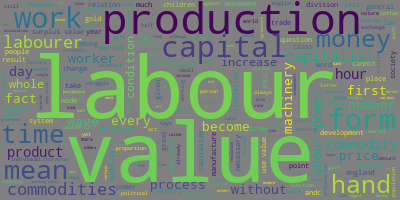

In [53]:
long_string_communism = ','.join(list(aft.loc[aft.school=='communism','sentence'].values))
wordcloud_c2 = WordCloud(background_color="grey", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop_words)
wordcloud_c2.generate(long_string_communism)
wordcloud_c2.to_image()

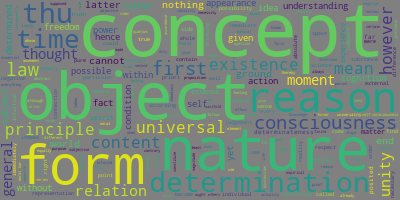

In [54]:
long_string_german_idealism = ','.join(list(aft.loc[aft.school=='german_idealism','sentence'].values))
wordcloud_g = WordCloud(background_color="grey", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop_words)
wordcloud_g.generate(long_string_german_idealism)
wordcloud_g.to_image()

In [33]:
def iswoman(ds):
    isin = []
    for sentence in ds.sentence_lowered:
        if re.search(r'\bwoman\b',sentence):
            isin.append(True)
        else:
            isin.append(False)
    return isin
def isman(ds):
    isin = []
    for sentence in ds.sentence_lowered:
        if re.search(r'\bman\b',sentence):
            isin.append(True)
        else:
            isin.append(False)
    return isin
def isfe(ds):
    isin = []
    for sentence in ds.sentence_lowered:
        if re.search(r'\bfemale\b',sentence):
            isin.append(True)
        else:
            isin.append(False)
    return isin
def isma(ds):
    isin = []
    for sentence in ds.sentence_lowered:
        if re.search(r'\bmale\b',sentence):
            isin.append(True)
        else:
            isin.append(False)
    return isin

In [49]:
aristotle = bef.loc[bef.school=='aristotle']

In [50]:
feminism = aft.loc[aft.school=='feminism']

In [113]:
stoicism = bef.loc[bef.school=='stoicism']

In [35]:
def remove_stopwords2(texts,stop_w):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_w] for doc in texts]

In [36]:
stop_word = stop_words.copy()
stop_word.extend(['male','males','female','females'])

In [39]:
from collections import Counter

In [37]:
def wordcount(ds,word,n,stop=stop_word):
    if word=='man':
        ds = ds.loc[isman(ds)]
    elif word=='woman':
        ds = ds.loc[iswoman(ds)]
    elif word=='female':
        ds = ds.loc[isfe(ds)]
    else:
        ds = ds.loc[isma(ds)]
    fetokens = [eval(tokens) for tokens in ds['tokenized_txt']]
    fetoken = remove_stopwords2(fetokens, stop_word)
    fetoken = [t for tokens in fetoken for t in tokens]
    counts_fe = Counter(fetoken)
    return(counts_fe.most_common(n))

In [97]:
demo1 = wordcount(aristotle,'female',20)
cols11 = [i for i,j in demo1]
cols12 = [j for i,j in demo1]
df1 = pd.DataFrame({'col1': cols11, 'col2': cols12})

Text(0, 0.5, 'count')

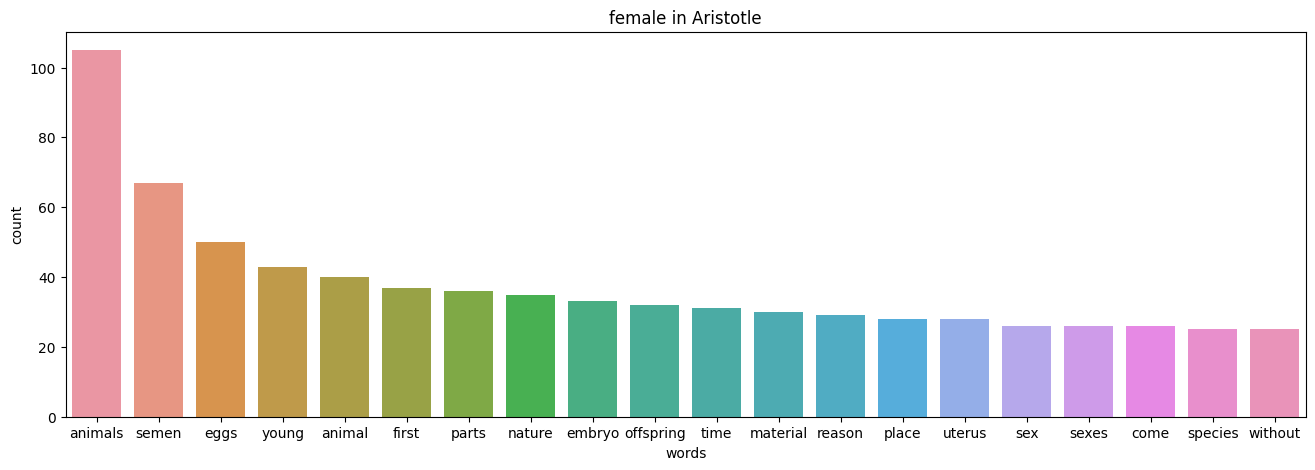

In [111]:
plt.figure(figsize=(16,5))
sns.barplot(x=df1.col1,y=df1.col2)
plt.title('female in Aristotle')
plt.xlabel('words')
plt.ylabel('count')

Text(0, 0.5, 'count')

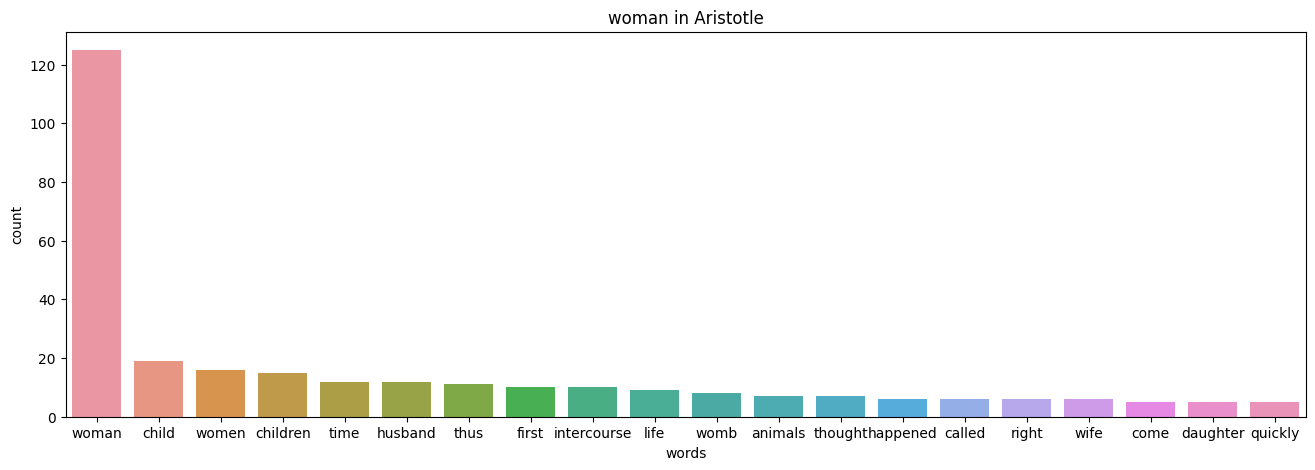

In [110]:
demo2 = wordcount(aristotle,'woman',20)
cols21 = [i for i,j in demo2]
cols22 = [j for i,j in demo2]
df2 = pd.DataFrame({'col1': cols21, 'col2': cols22})
plt.figure(figsize=(16,5))
sns.barplot(x=df2.col1,y=df2.col2)
plt.title('woman in Aristotle')
plt.xlabel('words')
plt.ylabel('count')

Text(0, 0.5, 'count')

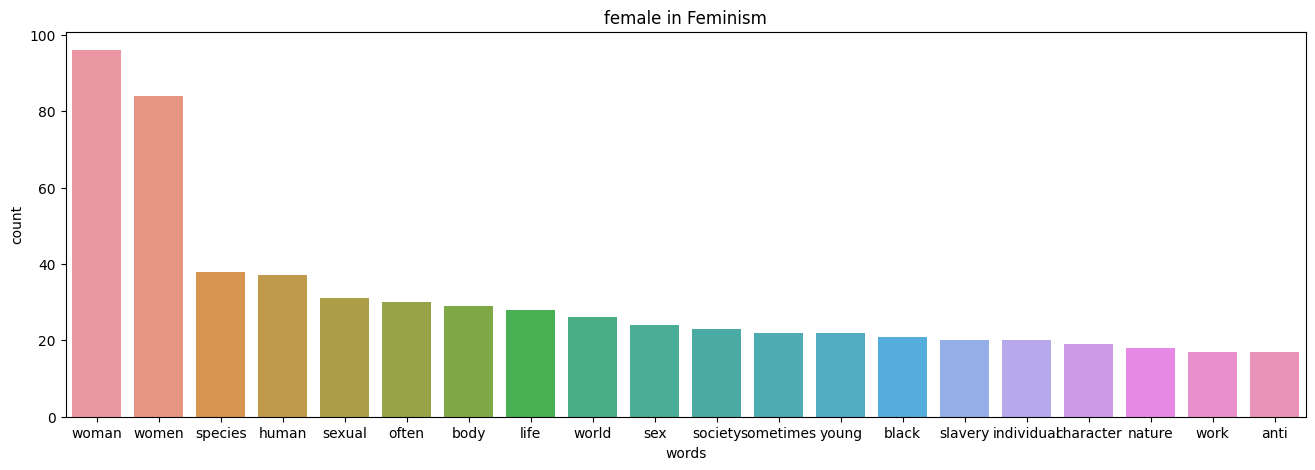

In [109]:
demo3 = wordcount(feminism,'female',20)
cols31 = [i for i,j in demo3]
cols32 = [j for i,j in demo3]
df3 = pd.DataFrame({'col1': cols31, 'col2': cols32})
plt.figure(figsize=(16,5))
sns.barplot(x=df3.col1,y=df3.col2)
plt.title('female in Feminism')
plt.xlabel('words')
plt.ylabel('count')

Text(0, 0.5, 'count')

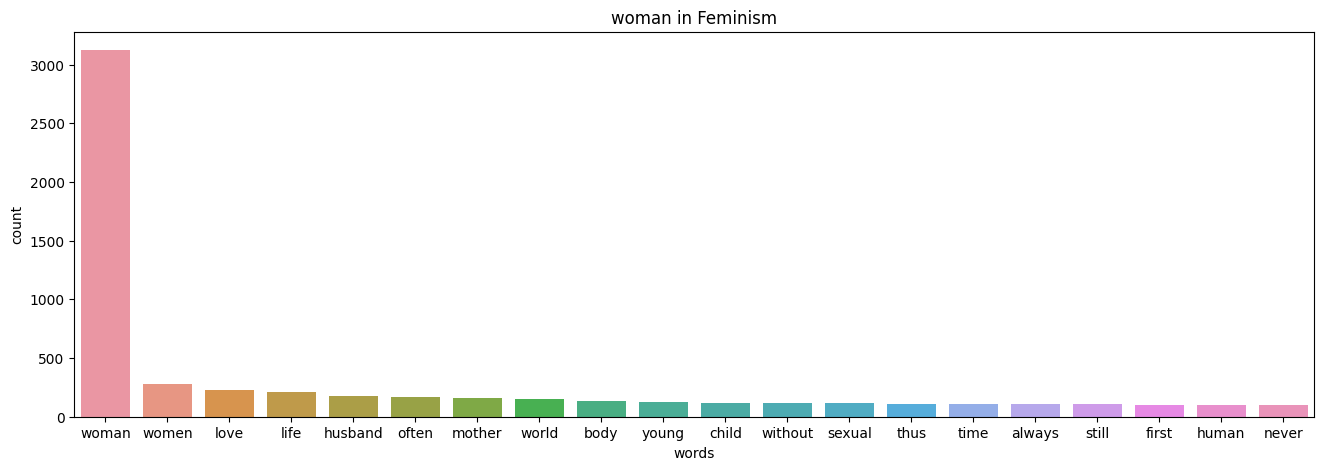

In [112]:
demo4 = wordcount(feminism,'woman',20)
cols41 = [i for i,j in demo4]
cols42 = [j for i,j in demo4]
df4 = pd.DataFrame({'col1': cols41, 'col2': cols42})
plt.figure(figsize=(16,5))
sns.barplot(x=df4.col1,y=df4.col2)
plt.title('woman in Feminism')
plt.xlabel('words')
plt.ylabel('count')

Text(0, 0.5, 'count')

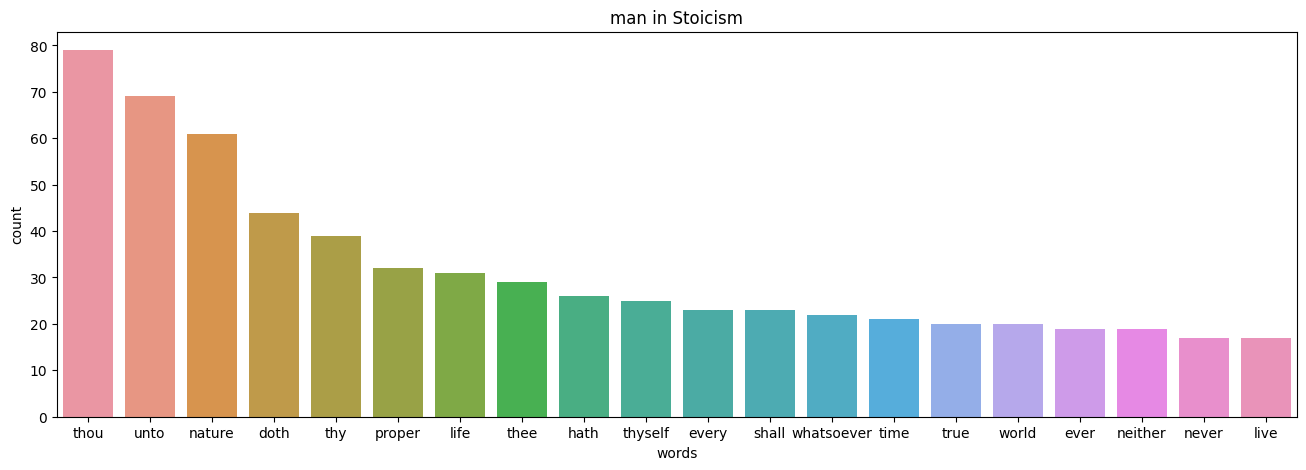

In [114]:
demo5 = wordcount(stoicism,'man',20)
cols51 = [i for i,j in demo5]
cols52 = [j for i,j in demo5]
df5 = pd.DataFrame({'col1': cols51, 'col2': cols52})
plt.figure(figsize=(16,5))
sns.barplot(x=df5.col1,y=df5.col2)
plt.title('man in Stoicism')
plt.xlabel('words')
plt.ylabel('count')

Text(0, 0.5, 'count')

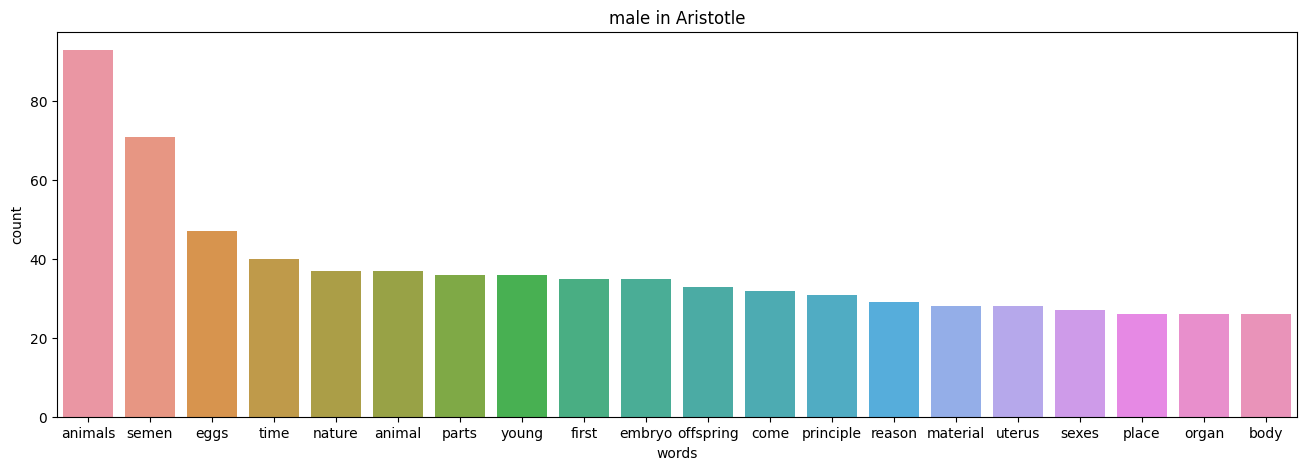

In [119]:
demo6 = wordcount(aristotle,'male',20)
cols61 = [i for i,j in demo6]
cols62 = [j for i,j in demo6]
df6 = pd.DataFrame({'col1': cols61, 'col2': cols62})
plt.figure(figsize=(16,5))
sns.barplot(x=df6.col1,y=df6.col2)
plt.title('male in Aristotle')
plt.xlabel('words')
plt.ylabel('count')

Text(0, 0.5, 'count')

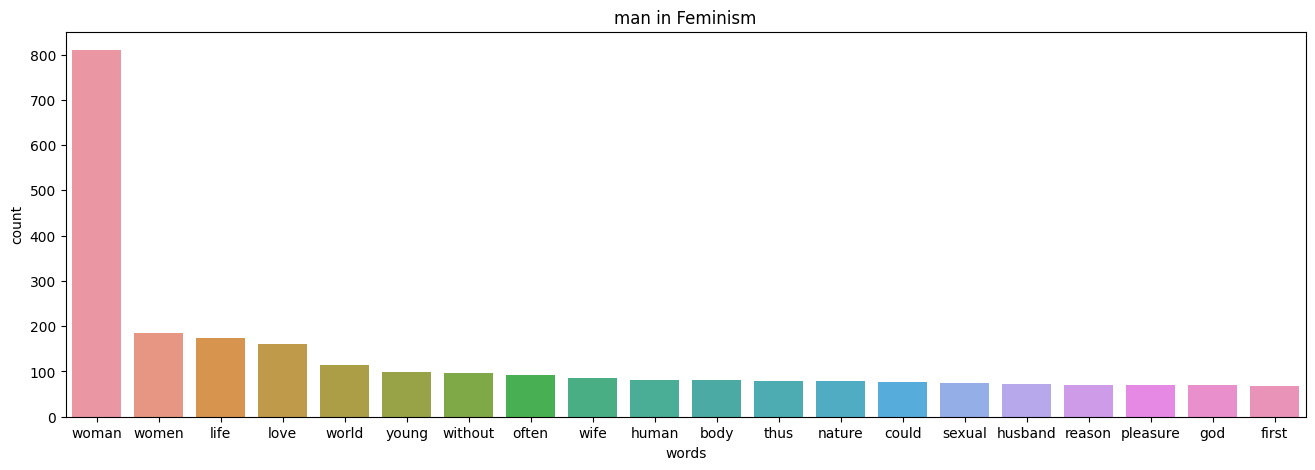

In [121]:
demo8 = wordcount(feminism,'man',20)
cols81 = [i for i,j in demo8]
cols82 = [j for i,j in demo8]
df8 = pd.DataFrame({'col1': cols81, 'col2': cols82})
plt.figure(figsize=(16,5))
sns.barplot(x=df8.col1,y=df8.col2)
plt.title('man in Feminism')
plt.xlabel('words')
plt.ylabel('count')

Text(0, 0.5, 'count')

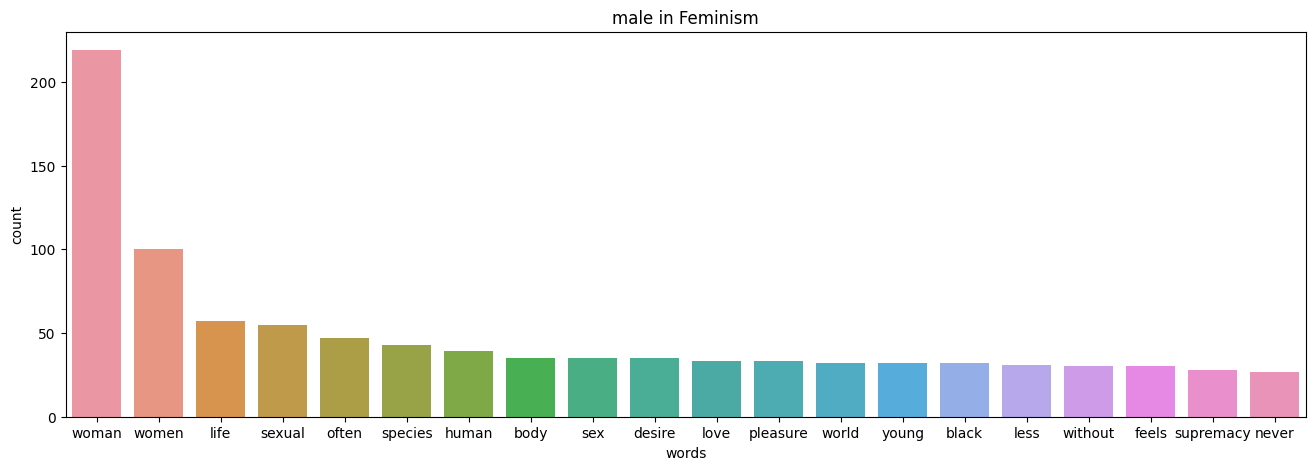

In [122]:
demo7 = wordcount(feminism,'male',20)
cols71 = [i for i,j in demo7]
cols72 = [j for i,j in demo7]
df7 = pd.DataFrame({'col1': cols71, 'col2': cols72})
plt.figure(figsize=(16,5))
sns.barplot(x=df7.col1,y=df7.col2)
plt.title('male in Feminism')
plt.xlabel('words')
plt.ylabel('count')

In [115]:
wordcount(stoicism,'man',40)

[('thou', 79),
 ('unto', 69),
 ('nature', 61),
 ('doth', 44),
 ('thy', 39),
 ('proper', 32),
 ('life', 31),
 ('thee', 29),
 ('hath', 26),
 ('thyself', 25),
 ('every', 23),
 ('shall', 23),
 ('whatsoever', 22),
 ('time', 21),
 ('true', 20),
 ('world', 20),
 ('ever', 19),
 ('neither', 19),
 ('never', 17),
 ('live', 17),
 ('consider', 16),
 ('yet', 16),
 ('shalt', 16),
 ('cannot', 16),
 ('mind', 16),
 ('death', 16),
 ('nothing', 15),
 ('art', 15),
 ('evil', 14),
 ('kind', 14),
 ('end', 14),
 ('matter', 13),
 ('much', 13),
 ('constitution', 13),
 ('able', 12),
 ('according', 12),
 ('without', 12),
 ('power', 12),
 ('natural', 12),
 ('well', 11)]

In [87]:
print('female in Aristotle')
wordcount(aristotle,'female',20)

female in Aristotle


[('animals', 105),
 ('semen', 67),
 ('eggs', 50),
 ('young', 43),
 ('animal', 40),
 ('first', 37),
 ('parts', 36),
 ('nature', 35),
 ('embryo', 33),
 ('offspring', 32),
 ('time', 31),
 ('material', 30),
 ('reason', 29),
 ('place', 28),
 ('uterus', 28),
 ('sex', 26),
 ('sexes', 26),
 ('come', 26),
 ('species', 25),
 ('without', 25)]

In [41]:
wordcount(aristotle,'male',20)

[('animals', 93),
 ('semen', 71),
 ('eggs', 47),
 ('time', 40),
 ('nature', 37),
 ('animal', 37),
 ('parts', 36),
 ('young', 36),
 ('first', 35),
 ('embryo', 35),
 ('offspring', 33),
 ('come', 32),
 ('principle', 31),
 ('reason', 29),
 ('material', 28),
 ('uterus', 28),
 ('sexes', 27),
 ('place', 26),
 ('organ', 26),
 ('body', 26)]

In [88]:
print('woman in Aristotle')
wordcount(aristotle,'woman',20)

woman in Aristotle


[('woman', 125),
 ('child', 19),
 ('women', 16),
 ('children', 15),
 ('time', 12),
 ('husband', 12),
 ('thus', 11),
 ('first', 10),
 ('intercourse', 10),
 ('life', 9),
 ('womb', 8),
 ('animals', 7),
 ('thought', 7),
 ('happened', 6),
 ('called', 6),
 ('right', 6),
 ('wife', 6),
 ('come', 5),
 ('daughter', 5),
 ('quickly', 5)]

In [43]:
wordcount(aristotle,'man',20)

[('animal', 318),
 ('animals', 270),
 ('white', 235),
 ('every', 203),
 ('reason', 187),
 ('property', 175),
 ('bad', 163),
 ('others', 155),
 ('nature', 153),
 ('time', 140),
 ('without', 138),
 ('excellence', 135),
 ('well', 129),
 ('ought', 128),
 ('horse', 126),
 ('sense', 125),
 ('true', 124),
 ('right', 124),
 ('acts', 123),
 ('possible', 120)]

In [89]:
print('female in Feminism')
wordcount(feminism,'female',20)

female in Feminism


[('woman', 96),
 ('women', 84),
 ('species', 38),
 ('human', 37),
 ('sexual', 31),
 ('often', 30),
 ('body', 29),
 ('life', 28),
 ('world', 26),
 ('sex', 24),
 ('society', 23),
 ('sometimes', 22),
 ('young', 22),
 ('black', 21),
 ('slavery', 20),
 ('individual', 20),
 ('character', 19),
 ('nature', 18),
 ('work', 17),
 ('anti', 17)]

In [45]:
wordcount(feminism,'male',20)

[('woman', 219),
 ('women', 100),
 ('life', 57),
 ('sexual', 55),
 ('often', 47),
 ('species', 43),
 ('human', 39),
 ('body', 35),
 ('sex', 35),
 ('desire', 35),
 ('love', 33),
 ('pleasure', 33),
 ('world', 32),
 ('young', 32),
 ('black', 32),
 ('less', 31),
 ('without', 30),
 ('feels', 30),
 ('supremacy', 28),
 ('never', 27)]

In [90]:
print('woman in Feminism')
wordcount(feminism,'woman',40)

woman in Feminism


[('woman', 3125),
 ('women', 276),
 ('love', 230),
 ('life', 214),
 ('husband', 178),
 ('often', 168),
 ('mother', 156),
 ('world', 152),
 ('body', 131),
 ('young', 128),
 ('child', 117),
 ('without', 116),
 ('sexual', 113),
 ('thus', 108),
 ('time', 108),
 ('always', 106),
 ('still', 105),
 ('first', 103),
 ('human', 99),
 ('never', 99),
 ('pleasure', 98),
 ('black', 97),
 ('work', 96),
 ('lover', 93),
 ('marriage', 90),
 ('well', 88),
 ('children', 87),
 ('wife', 86),
 ('object', 85),
 ('could', 85),
 ('nature', 84),
 ('flesh', 84),
 ('less', 83),
 ('wants', 83),
 ('little', 82),
 ('sex', 82),
 ('freedom', 80),
 ('desire', 79),
 ('fact', 79),
 ('feels', 79)]

In [47]:
wordcount(feminism,'man',20)

[('woman', 810),
 ('women', 186),
 ('life', 175),
 ('love', 161),
 ('world', 114),
 ('young', 99),
 ('without', 96),
 ('often', 93),
 ('wife', 85),
 ('human', 82),
 ('body', 81),
 ('thus', 78),
 ('nature', 78),
 ('could', 76),
 ('sexual', 75),
 ('husband', 72),
 ('reason', 69),
 ('pleasure', 69),
 ('god', 69),
 ('first', 68)]

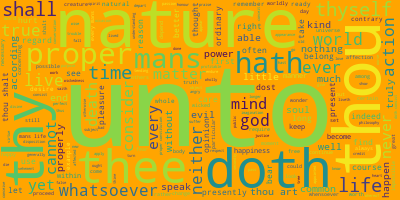

In [127]:
long_string_s = ','.join(list(stoicism.loc[isman(stoicism),'sentence'].values))
wordcloud_s = WordCloud(background_color="orange", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop_word)
wordcloud_s.generate(long_string_s)
wordcloud_s.to_image()

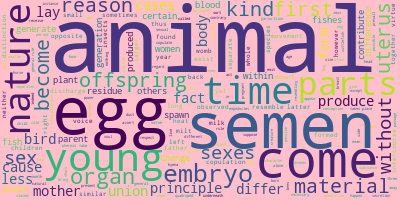

In [54]:
long_string_arisfe = ','.join(list(aristotle.loc[isfe(aristotle),'sentence'].values))
wordcloud_arisfe = WordCloud(background_color="pink", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop_word)
wordcloud_arisfe.generate(long_string_arisfe)
wordcloud_arisfe.to_image()

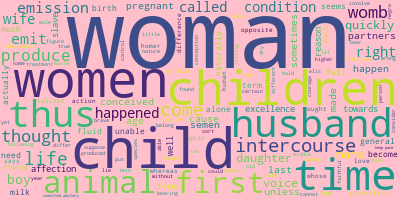

In [55]:
long_string_ariswm = ','.join(list(aristotle.loc[iswoman(aristotle),'sentence'].values))
wordcloud_ariswm = WordCloud(background_color="pink", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop_word)
wordcloud_ariswm.generate(long_string_ariswm)
wordcloud_ariswm.to_image()

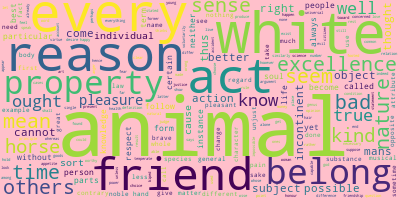

In [61]:
long_string_arism = ','.join(list(aristotle.loc[isman(aristotle),'sentence'].values))
wordcloud_arism = WordCloud(background_color="pink", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop_word)
wordcloud_arism.generate(long_string_arism)
wordcloud_arism.to_image()

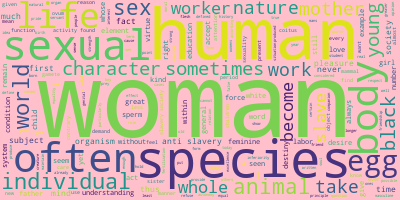

In [56]:
stopw = stop_word.copy()
stopw.extend(['women'])
long_string_fmf = ','.join(list(feminism.loc[isfe(feminism),'sentence'].values))
wordcloud_fmf = WordCloud(background_color="pink", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stopw)
wordcloud_fmf.generate(long_string_fmf)
wordcloud_fmf.to_image()

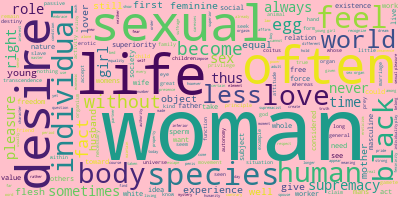

In [57]:
long_string_fmm = ','.join(list(feminism.loc[isma(feminism),'sentence'].values))
wordcloud_fmm = WordCloud(background_color="pink", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stopw)
wordcloud_fmm.generate(long_string_fmm)
wordcloud_fmm.to_image()

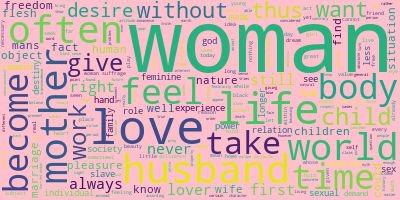

In [58]:
long_string_fmw = ','.join(list(feminism.loc[iswoman(feminism),'sentence'].values))
wordcloud_fmw = WordCloud(background_color="pink", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stopw)
wordcloud_fmw.generate(long_string_fmw)
wordcloud_fmw.to_image()

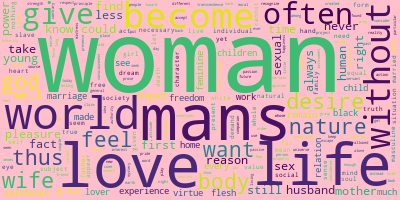

In [62]:
long_string_fme = ','.join(list(feminism.loc[isman(feminism),'sentence'].values))
wordcloud_fme = WordCloud(background_color="pink", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stopw)
wordcloud_fme.generate(long_string_fme)
wordcloud_fme.to_image()

In [64]:
ar_wm = aristotle.loc[iswoman(aristotle)]
cons = isman(ar_wm)
sum(cons)/len(cons)

0.4336283185840708

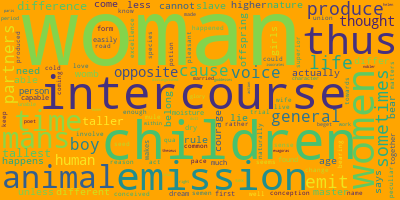

In [139]:
long_string_wm = ','.join(list(ar_wm.loc[cons,'sentence'].values))
wordcloud_wm = WordCloud(background_color="orange", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop_word)
wordcloud_wm.generate(long_string_wm)
wordcloud_wm.to_image()

In [65]:
ar_m = aristotle.loc[isman(aristotle)]
cons2 = iswoman(ar_m)
sum(cons2)/len(cons2)

0.015730337078651686

In [66]:
fe_w = feminism.loc[iswoman(feminism)]
cons3 = isman(fe_w)
sum(cons3)/len(cons3)

0.24225151407196294

In [67]:
fe_m = feminism.loc[isman(feminism)]
cons4 = iswoman(fe_m)
sum(cons4)/len(cons4)

0.4

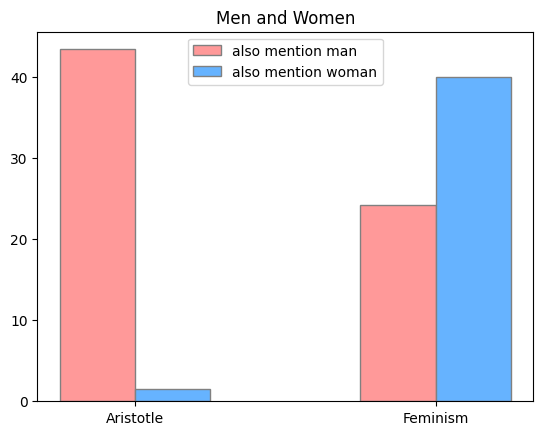

In [144]:
barWidth = 0.25

p1 = [43.36,24.23]
p2 = [1.57,40]

br1 = np.arange(len(p1))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, p1, color ='#ff9999', width = barWidth,
        edgecolor ='grey', label ='also mention man')
plt.bar(br2, p2, color ='#66b3ff', width = barWidth,
        edgecolor ='grey', label ='also mention woman')

plt.title('Men and Women')
plt.xticks([r+0.125 for r in range(len(p1))],
        ['Aristotle','Feminism'])
plt.legend()
plt.show()

- Sentiment Analysis using Vader
  - Show sentiment results of different times.
  - Compare attitudes towards 'man' versus 'woman' in different times.
  - Compare attitudes towards 'man' or 'woman' in different schools.
  - View some of the most positive and negative sentence in different schools.

In [68]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [69]:
def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    if sentiment_dict['compound'] >= 0.05 :
        return("Positive")
 
    elif sentiment_dict['compound'] <= - 0.05 :
        return("Negative")
 
    else :
        return("Neutral")
 

In [70]:
def senti(df):      
    corpus = ''
    numPostives = 0
    numNegatives = 0
    numNeutrals = 0
    
    for mem in df['sentence_lowered']:
        corpus += mem
    
    for i in range (len(df)):
        sent = (sentiment_scores(df['sentence_lowered'].iloc[i]))
        if sent == "Positive":
            numPostives += 1
        elif sent == "Negative":
            numNegatives += 1
        else:
            numNeutrals += 1
    
    if len(df)<100000:
        thetime = 'early'
    else:
        thetime = 'modern'

    plt.figure(figsize = (7, 7))
    plt.pie([numPostives, numNegatives, numNeutrals], labels = ['positives', 'negatives', 'neutrals'], autopct='%1.2f%%', colors = ['#ff9999','#66b3ff','#ffcc99'])
    plt.title('Sentiment Analysis for '+thetime+ ' Philosopher')

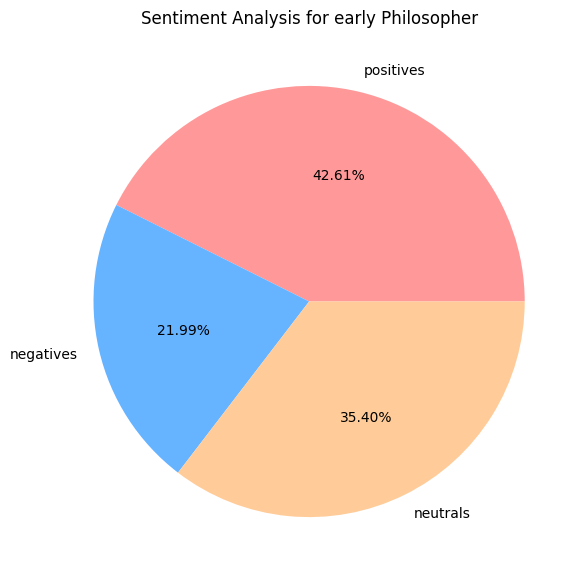

In [317]:
senti(bef)

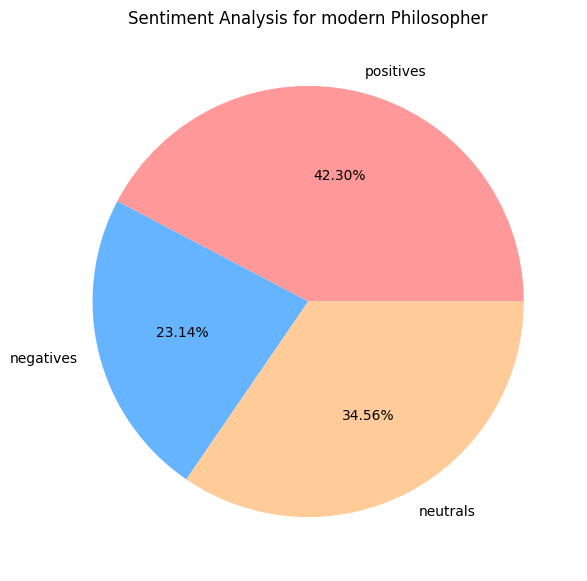

In [230]:
senti(aft)

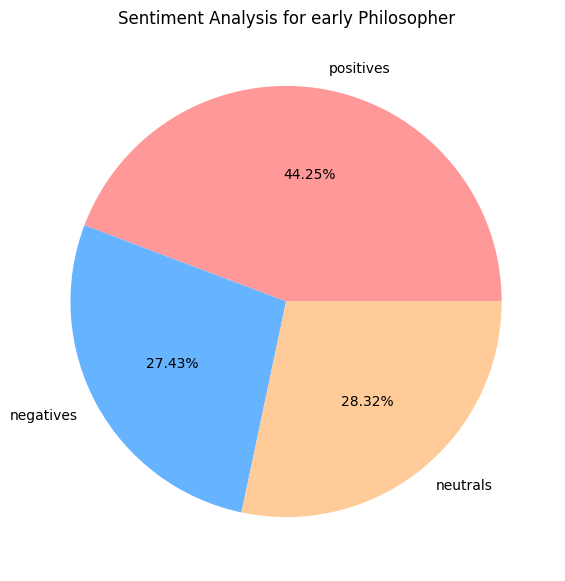

In [71]:
senti(ar_wm)

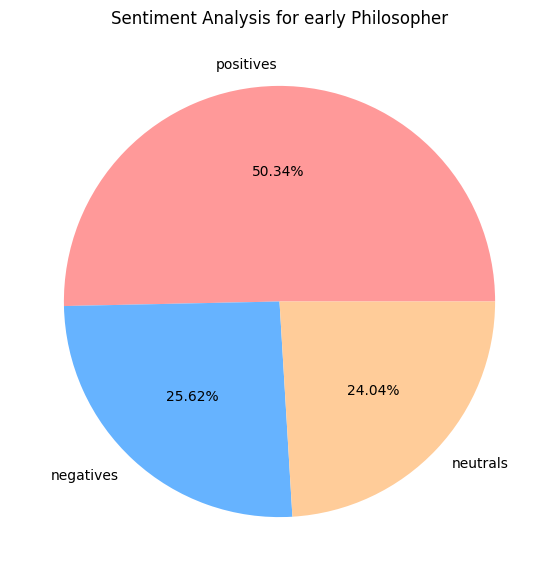

In [72]:
senti(ar_m)

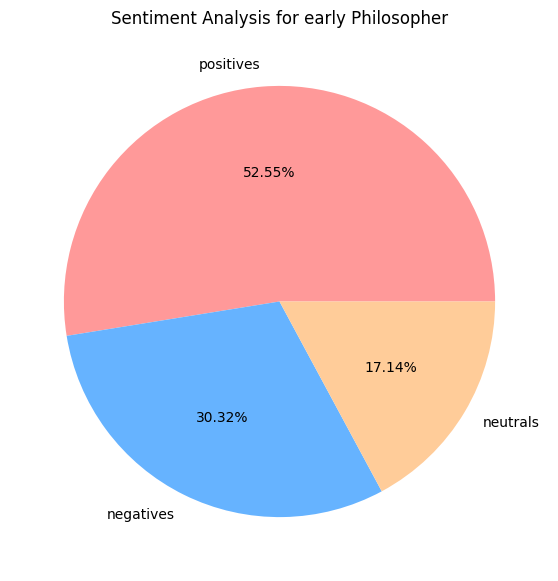

In [73]:
senti(fe_w)

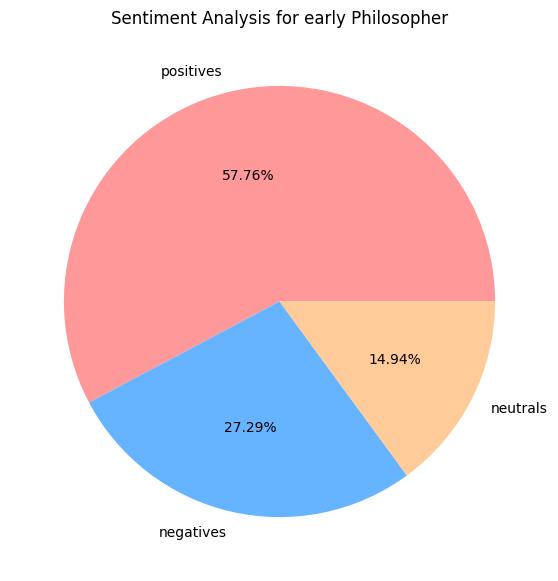

In [74]:
senti(fe_m)

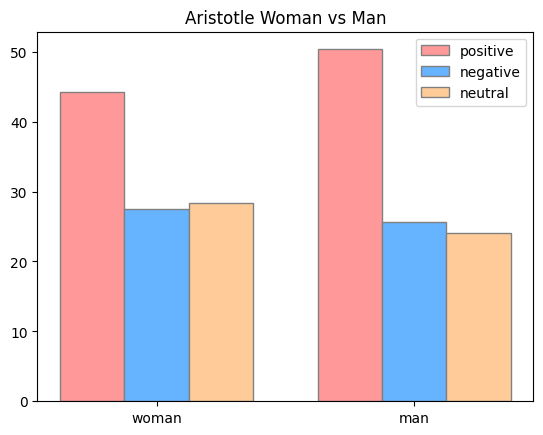

In [75]:
barWidth = 0.25

p1 = [44.25,50.34]
p2 = [27.43,25.62]
p3 = [28.32,24.04]

br1 = np.arange(len(p1))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, p1, color ='#ff9999', width = barWidth,
        edgecolor ='grey', label ='positive')
plt.bar(br2, p2, color ='#66b3ff', width = barWidth,
        edgecolor ='grey', label ='negative')
plt.bar(br3, p3, color ='#ffcc99', width = barWidth,
        edgecolor ='grey', label ='neutral')

plt.title('Aristotle Woman vs Man')
plt.xticks([r + barWidth for r in range(len(p1))],
        ['woman','man'])
 
plt.legend()
plt.show()

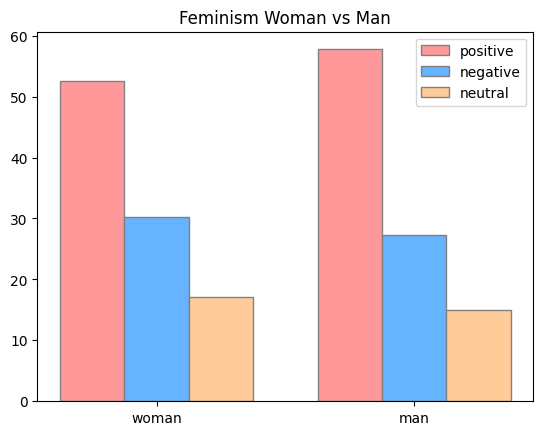

In [76]:
p1 = [52.55,57.76]
p2 = [30.32,27.29]
p3 = [17.14,14.94]

plt.bar(br1, p1, color ='#ff9999', width = barWidth,
        edgecolor ='grey', label ='positive')
plt.bar(br2, p2, color ='#66b3ff', width = barWidth,
        edgecolor ='grey', label ='negative')
plt.bar(br3, p3, color ='#ffcc99', width = barWidth,
        edgecolor ='grey', label ='neutral')

plt.title('Feminism Woman vs Man')
plt.xticks([r + barWidth for r in range(len(p1))],
        ['woman','man'])
 
plt.legend()
plt.show()

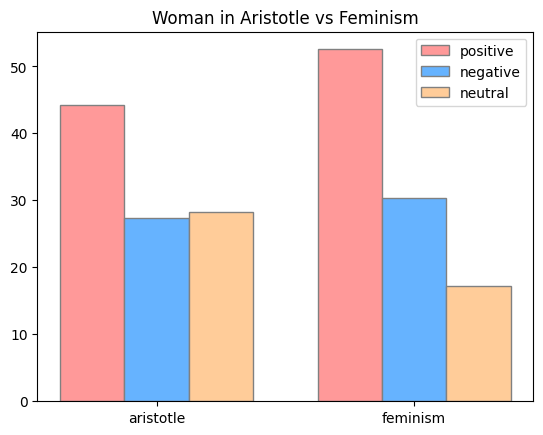

In [77]:
p1 = [44.25,52.55]
p2 = [27.43,30.32]
p3 = [28.32,17.14]

plt.bar(br1, p1, color ='#ff9999', width = barWidth,
        edgecolor ='grey', label ='positive')
plt.bar(br2, p2, color ='#66b3ff', width = barWidth,
        edgecolor ='grey', label ='negative')
plt.bar(br3, p3, color ='#ffcc99', width = barWidth,
        edgecolor ='grey', label ='neutral')

plt.title('Woman in Aristotle vs Feminism')
plt.xticks([r + barWidth for r in range(len(p1))],
        ['aristotle','feminism'])
 
plt.legend()
plt.show()

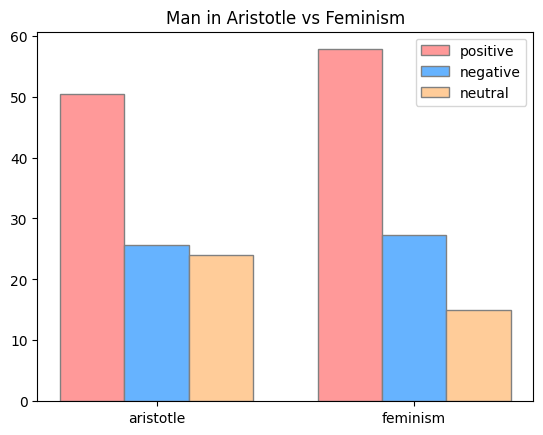

In [78]:
p1 = [50.34,57.76]
p2 = [25.62,27.29]
p3 = [24.04,14.94]

plt.bar(br1, p1, color ='#ff9999', width = barWidth,
        edgecolor ='grey', label ='positive')
plt.bar(br2, p2, color ='#66b3ff', width = barWidth,
        edgecolor ='grey', label ='negative')
plt.bar(br3, p3, color ='#ffcc99', width = barWidth,
        edgecolor ='grey', label ='neutral')

plt.title('Man in Aristotle vs Feminism')
plt.xticks([r + barWidth for r in range(len(p1))],
        ['aristotle','feminism'])
 
plt.legend()
plt.show()

In [46]:
def pos(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return(sentiment_dict['pos'])
def neg(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return(sentiment_dict['neg'])
def neu(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return(sentiment_dict['neu'])

In [48]:
df = bef.loc[bef.school=='plato']
df['score'] = df['sentence_lowered'].apply(pos)

C:\Users\28047\AppData\Local\Temp\ipykernel_25608\1170715922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score'] = df['sentence_lowered'].apply(pos)


In [56]:
df.sort_values('score')[-20:].sentence_spacy

26753                       Yes, it's altogether splendid!
2832                               Wisdom' ('phronēsis').
31019                     Yes, that's perfectly plausible.
23398                   that justice is the greatest good.
10610    Love cares well for good men, cares not for ba...
25890                                 You've divined well.
4031                 Yes, that's certainly true, Socrates.
97                                    Splendid, Euthyphro!
20439                         Surely virtue makes us good?
18622                                 Perfectly monstrous!
11857                              But beauty was radiant.
3609                             Yes, certainly, Socrates.
3905                            Theaetetus Yes, certainly.
13867                             Important and admirable?
17619                            Good heavens, different.'
13839                              The beneficial, surely.
26707                                 That's pretty clea

In [57]:
df2 = aft.loc[aft.school=='feminism']
df2['score'] = df2['sentence_lowered'].apply(pos)
df2.sort_values('score')[-20:].sentence_spacy

C:\Users\28047\AppData\Local\Temp\ipykernel_25608\4103958823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['score'] = df2['sentence_lowered'].apply(pos)


346637                               The Ladies' Champion).
350857        Self assurance has a certain triumphant aura.
350827                        Such loves raise no problems.
354450                                I am calm and happy.'
356472    When it is carnally consummated, desire for lo...
356202                   Adorable, I find myself adorable.'
352008                so she gained triumphant masculinity.
350376                        I felt the greatest sympathy.
343743                       Such men will inspire passion.
347276                     Thank God for creating woman.' '
348397    Giver of joy, peace, heat, strength, and pleas...
343718                            charm he never so wisely.
356353    Knowing they are lovable, desirable, and admir...
353545                   ; she liked the 'honesty of heart'
354816                    Yes, yes, of course.' 'Thank you.
350776             To my beloved fairy, my dearest darling.
342446                      so sure our 

In [58]:
df3 = aft.loc[aft.school=='capitalism']
df3['score'] = df3['sentence_lowered'].apply(pos)
df3.sort_values('score')[-20:].sentence_spacy

C:\Users\28047\AppData\Local\Temp\ipykernel_25608\1541336994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['score'] = df3['sentence_lowered'].apply(pos)


317613      Their kindness naturally provokes his kindness.
311567    The projectors, no doubt, had in their golden ...
308042    give occasion to any great difference of talents.
324256                               Certainly the ordinary
311884    and their profits must have been sufficient to...
312488    It seldom happens, however, that a great propr...
325889    That these propositions are true to a great ex...
322690                             Politicians like Hughie.
316928              The great increase of their fortune had
315651           Their wealth was considered as our wealth.
325756                    In truth the opposite holds good.
314669    The liberal reward of labour encourages marriage.
316849                    they had the exclusive privilege.
319211    Such people are commonly men of mean birth, bu...
314679    What encourages the progress of population and...
314086       But the great encouragement which a bounty of.
309111    The rise of profit operates li

In [ ]:
ar_m['score'] = ar_m['sentence_lowered'].apply(pos)
ar_m.sort_values('score')[-20:].sentence_spacy

In [ ]:
ar_wm['score'] = ar_wm['sentence_lowered'].apply(pos)
ar_wm.sort_values('score')[-20:].sentence_spacy

In [ ]:
fe_m['score'] = fe_m['sentence_lowered'].apply(pos)
fe_m.sort_values('score')[-20:].sentence_spacy

In [ ]:
fe_w['score'] = fe_w['sentence_lowered'].apply(pos)
fe_w.sort_values('score')[-20:].sentence_spacy